## Financial Time Series Project
#### Task 1: Data analysis

First thing to do with the data is perform some *clean up*, in order to do that we wanna take a general look at the data.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load CSV
file_path = "./spiff_data.csv"
data = pd.read_csv(file_path)

data.info()
data.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5456 entries, 0 to 5455
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    5456 non-null   int64  
 1   day           5456 non-null   int64  
 2   gurkor        5206 non-null   float64
 3   guitars       5206 non-null   float64
 4   slingshots    5206 non-null   float64
 5   stocks        5206 non-null   float64
 6   sugar         5206 non-null   float64
 7   water         5206 non-null   float64
 8   tranquillity  5206 non-null   float64
dtypes: float64(7), int64(2)
memory usage: 383.8 KB


Unnamed: 0  day    gurkor   guitars  slingshots     stocks     sugar  \
0           0    1  6.154653  2.794285    2.136536  10.653684  3.324896   
1           1    2  6.189623  2.843068    2.113582  10.674465  3.355736   
2           2    3  6.168641  2.839644    2.116336  10.822372  3.336461   
3           3    4  6.156401  2.823384    2.096137  10.848804  3.288274   
4           4    5  6.124929  2.832798    2.099810  10.860731  3.303694   

      water  tranquillity  
0  3.896149      7.755880  
1  3.899915      7.781310  
2  3.897404      7.886205  
3  3.901170      7.848061  
4  3.905355      7.883026

In [3]:
data.describe()

Unnamed: 0          day       gurkor      guitars   slingshots  \
count  5456.000000  5456.000000  5206.000000  5206.000000  5206.000000   
mean   2727.500000  2728.500000     9.886550     6.713898     4.519504   
std    1575.155865  1575.155865    30.785709    30.850516    30.883866   
min       0.000000     1.000000     5.942896     2.629048     2.001362   
25%    1363.750000  1364.750000     6.948963     4.258847     2.808930   
50%    2727.500000  2728.500000     8.907936     5.912364     3.384898   
75%    4091.250000  4092.250000    10.191398     7.058370     4.294821   
max    5455.000000  5456.000000  1000.000000  1000.000000  1000.000000   

            stocks        sugar        water  tranquillity  
count  5206.000000  5206.000000  5206.000000   5206.000000  
mean      7.309093     3.621403     6.749451     12.502258  
std      30.856220    30.904930    30.825744     30.774131  
min       4.012346     1.370262     3.739412      6.614749  
25%       4.917271     1.999489     4.996764      9.194215  
50%       5.521318     2.606234     5.775716     10.591227  
75%       6.977501     3.281805     6.492295     13.382072  
max    1000.000000  1000.000000  1000.000000   1000.000000

From the above we can notice two things, that the max value for each TS is 1000 which seems a bit odd and that there is some missing data.

array([<Axes: xlabel='day'>, <Axes: xlabel='day'>, <Axes: xlabel='day'>,
       <Axes: xlabel='day'>, <Axes: xlabel='day'>, <Axes: xlabel='day'>,
       <Axes: xlabel='day'>], dtype=object)

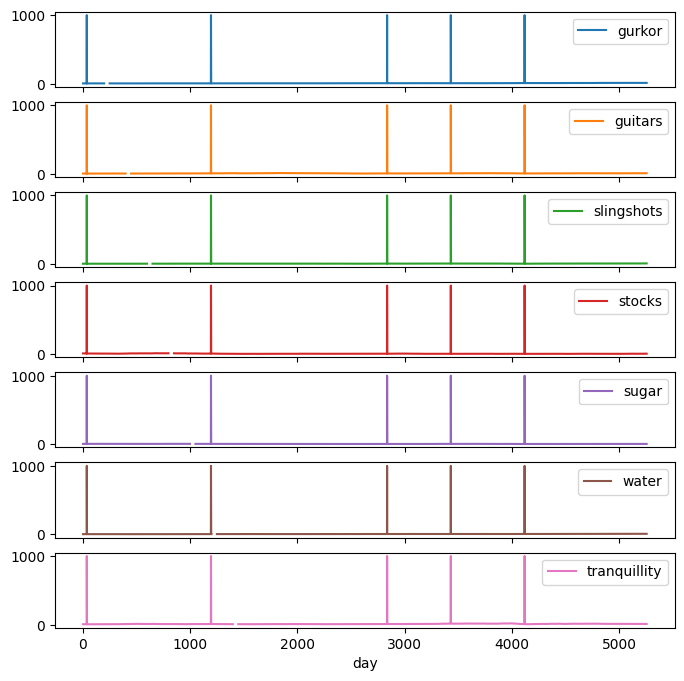

In [3]:
data.set_index("day", inplace=True)
data.drop(columns=['Unnamed: 0'], inplace=True)
data.plot(subplots=True, figsize=(8,8), )



##### We want to clean up the data by removing the spikes

<Axes: xlabel='day'>

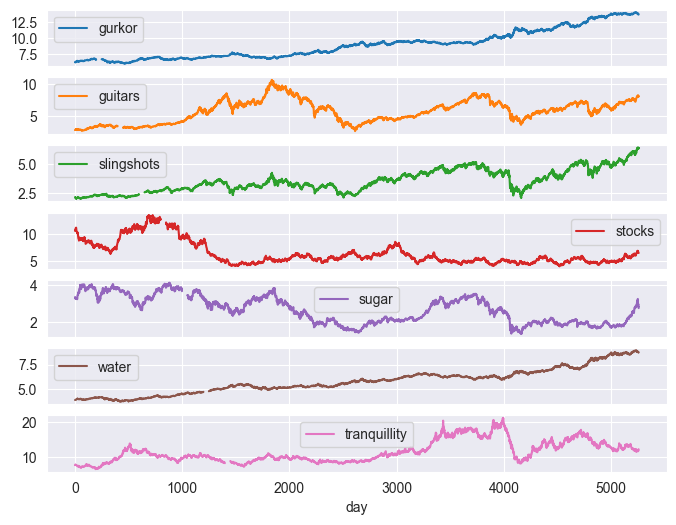

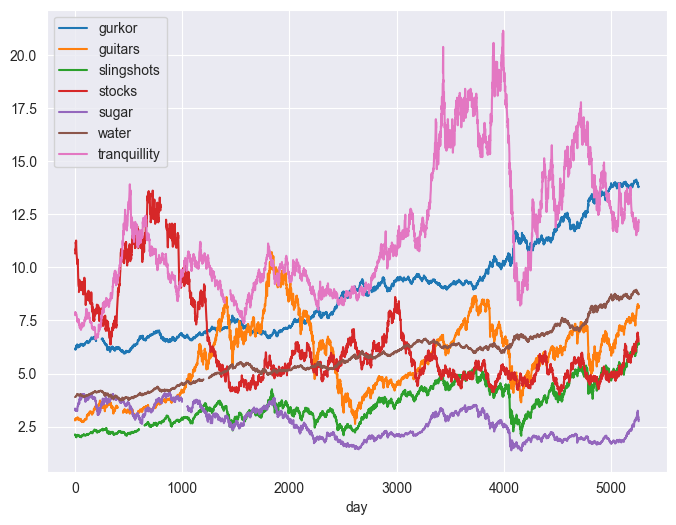

In [5]:
import seaborn as sns
sns.set_style("darkgrid")
data_filtered = data.copy()


data_filtered[data_filtered >= 500] = np.nan
data_filtered.plot(subplots=True, figsize=(8,6), )
data_filtered.plot(figsize=(8,6))

The filtered result looks much better. From looking at the plots (gurkor, water) and (guitars, slingshots) seem to have a ?similar? trend. We also see a large market crash around day 4000 for a lot of them.

In [6]:
data_filtered.describe()

gurkor      guitars   slingshots       stocks        sugar  \
count  5201.000000  5201.000000  5201.000000  5201.000000  5201.000000   
mean      8.934701     5.758999     3.562496     6.354767     2.663530   
std       2.268289     1.756993     0.973406     2.139400     0.727010   
min       5.942896     2.629048     2.001362     4.012346     1.370262   
25%       6.947150     4.252728     2.804869     4.916920     1.999030   
50%       8.905505     5.907840     3.383130     5.520531     2.605522   
75%      10.183919     7.055568     4.291411     6.946382     3.279982   
max      14.132395    10.719387     6.468982    13.613052     4.125193   

             water  tranquillity  
count  5201.000000   5201.000000  
mean      5.794586     11.552924  
std       1.275024      3.067634  
min       3.739412      6.614749  
25%       4.996563      9.186268  
50%       5.774852     10.584870  
75%       6.488217     13.380483  
max       8.949187     21.137953

array([<Axes: xlabel='day'>, <Axes: xlabel='day'>, <Axes: xlabel='day'>,
       <Axes: xlabel='day'>, <Axes: xlabel='day'>, <Axes: xlabel='day'>,
       <Axes: xlabel='day'>], dtype=object)

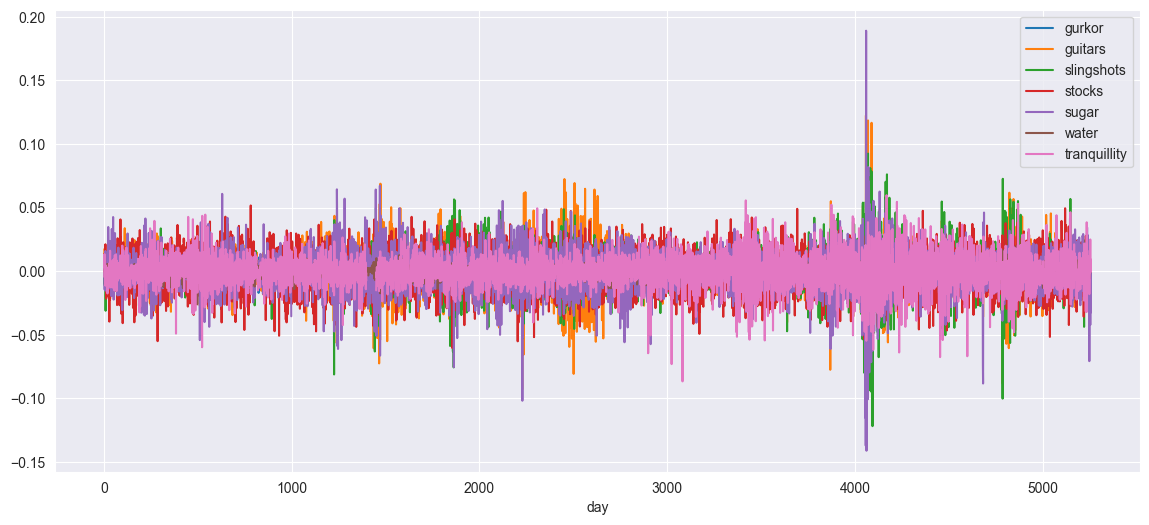

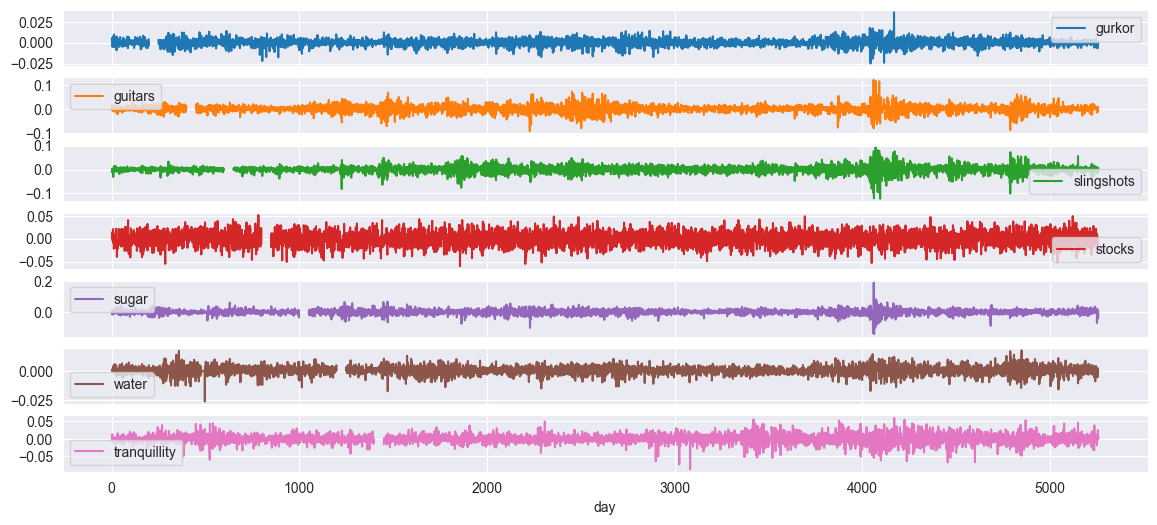

In [6]:
import seaborn as sns
sns.set_style("darkgrid")
log_returns = np.log( data_filtered / data_filtered.shift(1))

log_returns.plot(figsize=(14,6))
log_returns.plot(subplots=True, figsize=(14,6))

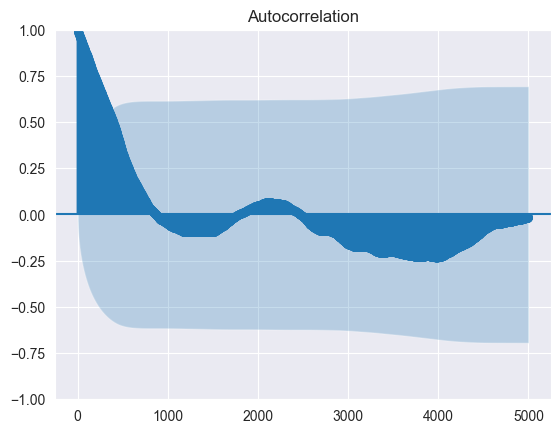

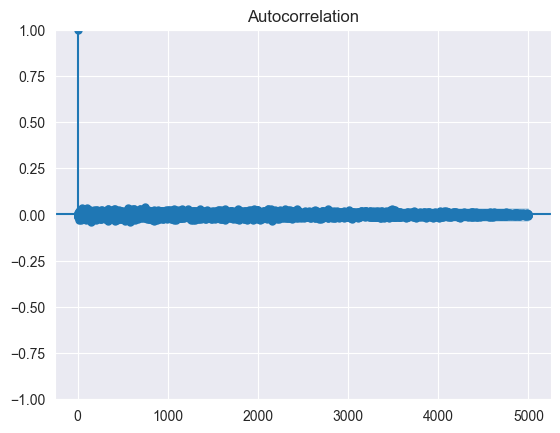

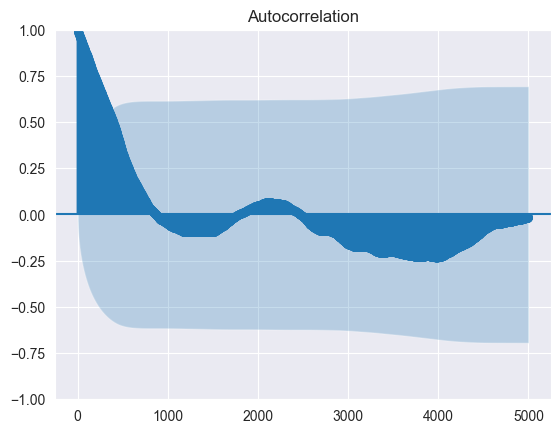

In [8]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

name = "stocks"

sns.set_style("darkgrid")
series = log_returns[name].dropna()
series2 = data_filtered[name].dropna()

lag = 5000

plot_acf(series, lags=lag, alpha=0.05)
plot_acf(series2, lags=lag, alpha=0.05)


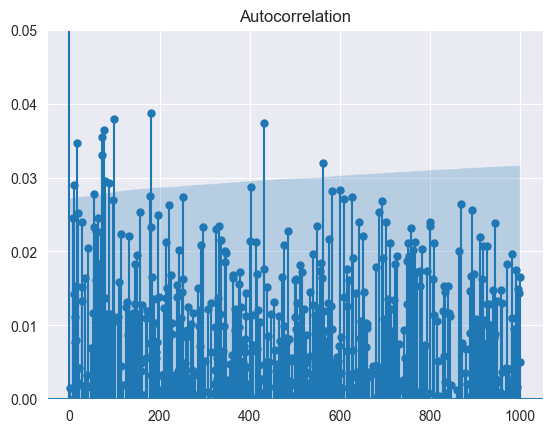

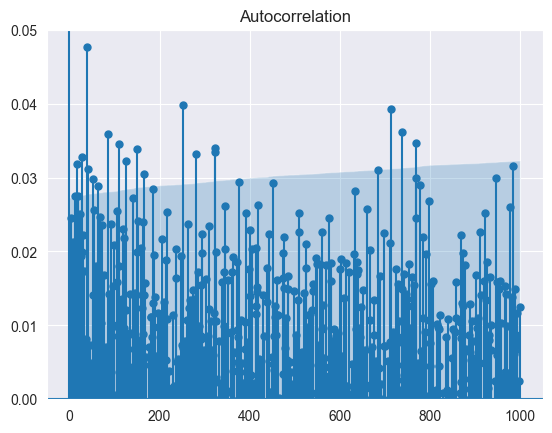

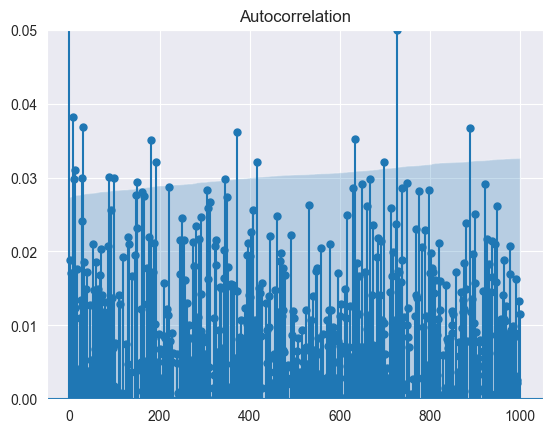

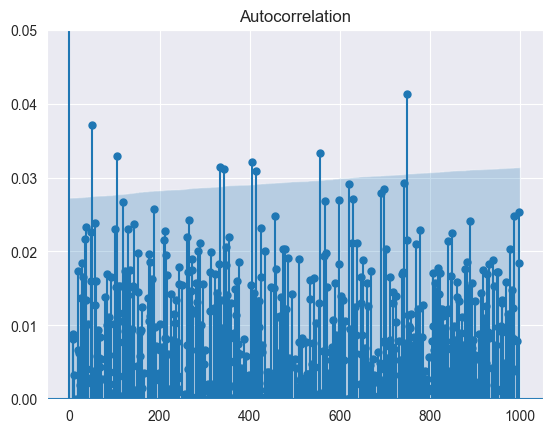

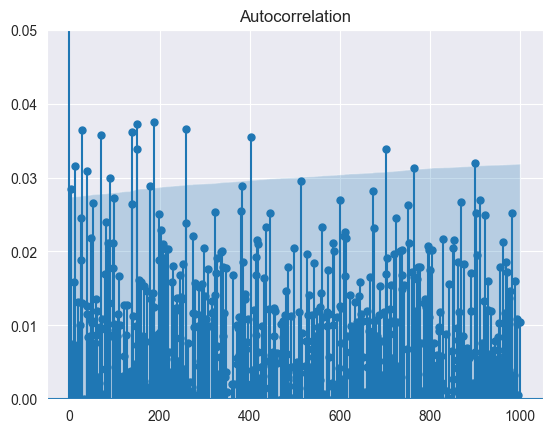

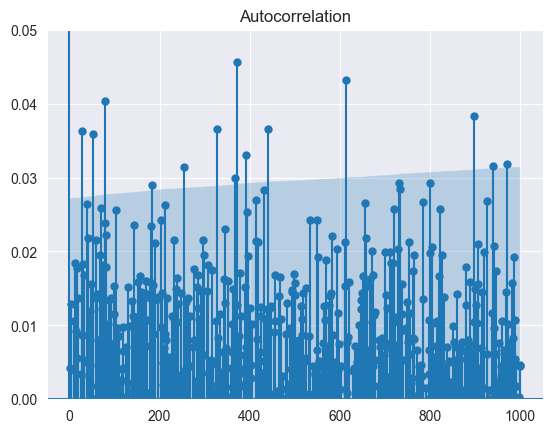

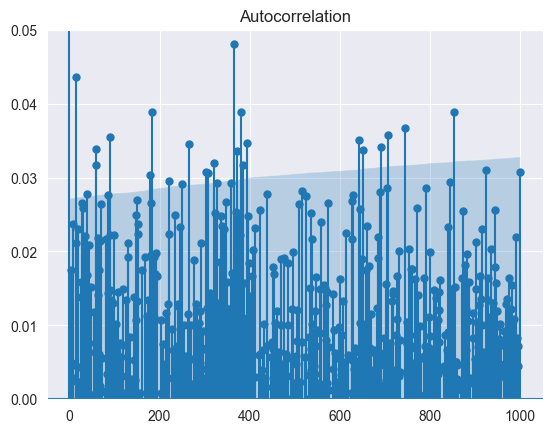

In [9]:
# Set up plotting
series_list = log_returns.columns
lags = 1000
figsize = (10, 4)

# Plot ACF and PACF for each series
for series in series_list:
    
    plot_acf(log_returns[series].dropna(), lags=lags, alpha=0.05)
    plt.ylim(0, .05)

#### Use ADF test to check if log returns are stationary. 
The log returns have no trend. Null hypo is *this series is non-stationary* if p-value is small enough we can reject this aka its stationary.

In [10]:
from statsmodels.tsa.stattools import adfuller

print("ADF Test Results (log returns):")
for col in log_returns.columns:
    result = adfuller(log_returns[col].dropna())
    print(f"{col}: ADF={result[0]:.4f}, p-value={result[1]:5f}")


ADF Test Results (log returns):
gurkor: ADF=-53.1885, p-value=0.000000
guitars: ADF=-12.1853, p-value=0.000000
slingshots: ADF=-19.1148, p-value=0.000000
stocks: ADF=-72.1206, p-value=0.000000
sugar: ADF=-36.8048, p-value=0.000000
water: ADF=-43.1526, p-value=0.000000
tranquillity: ADF=-73.5667, p-value=0.000000


#### Calculating the correlation between the log returns

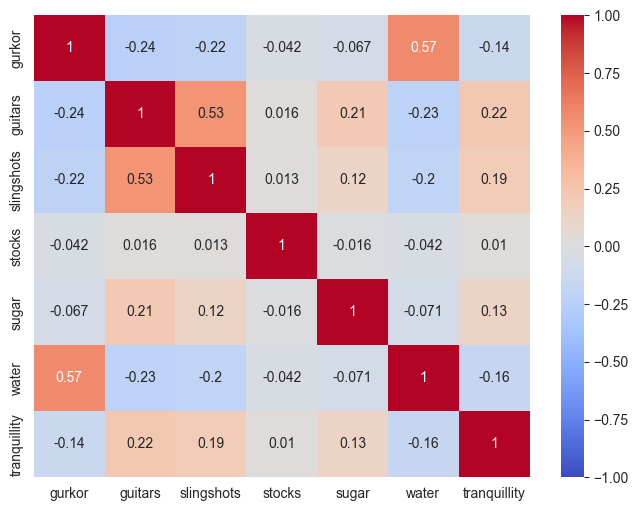

gurkor   guitars  slingshots    stocks     sugar     water  \
gurkor        1.000000 -0.241075   -0.216712 -0.041636 -0.066739  0.573293   
guitars      -0.241075  1.000000    0.526253  0.016316  0.211811 -0.226021   
slingshots   -0.216712  0.526253    1.000000  0.013391  0.118452 -0.201113   
stocks       -0.041636  0.016316    0.013391  1.000000 -0.015689 -0.042117   
sugar        -0.066739  0.211811    0.118452 -0.015689  1.000000 -0.071434   
water         0.573293 -0.226021   -0.201113 -0.042117 -0.071434  1.000000   
tranquillity -0.137819  0.223933    0.188563  0.010027  0.126743 -0.157992   

              tranquillity  
gurkor           -0.137819  
guitars           0.223933  
slingshots        0.188563  
stocks            0.010027  
sugar             0.126743  
water            -0.157992  
tranquillity      1.000000

In [11]:
import seaborn as sns

corr_matrix = log_returns.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

corr_matrix

Find high correlation for (water, gurkor) and (slingshots, guitars) as we guessed from the plots. A lot of pairs have mild correlation some like (stocks, tranquility) have none.

Need to find some tools to classify groups

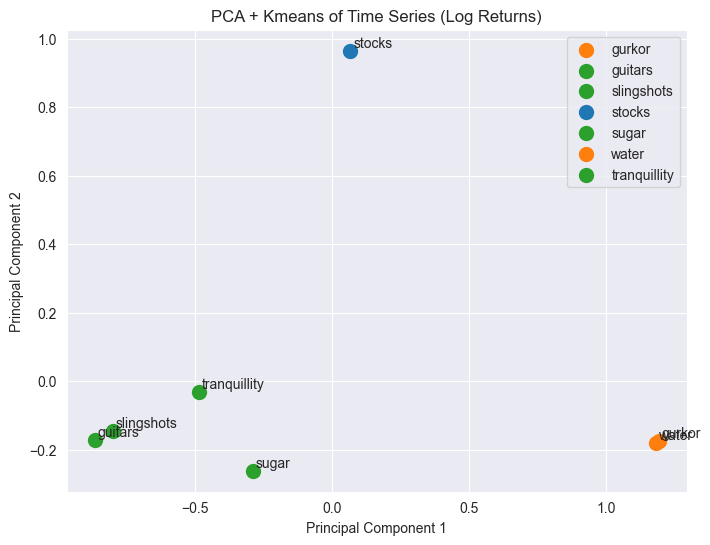

{np.int32(0): ['stocks'],
 np.int32(1): ['gurkor', 'water'],
 np.int32(2): ['guitars', 'slingshots', 'sugar', 'tranquillity']}

In [12]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
sns.set_style("darkgrid")

kmeans = KMeans(n_clusters=3)
labels = kmeans.fit_predict(corr_matrix)

pca = PCA(n_components=2)
pca_components = pca.fit_transform(corr_matrix)

plt.figure(figsize=(8, 6))
for i, name in enumerate(corr_matrix.columns):
    plt.scatter(pca_components[i, 0], pca_components[i, 1], c=f"C{labels[i]}", label=name, s=100)
    plt.text(pca_components[i, 0]+0.01, pca_components[i, 1]+0.01, name)

plt.title("PCA + Kmeans of Time Series (Log Returns)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid(True)
plt.show()


clustered_groups = {i: [] for i in set(labels)}
for idx, label in enumerate(labels):
    clustered_groups[label].append(corr_matrix.columns[idx])

clustered_groups

Need to understand PCA better

Rolling volatility (50 days):
Rolling mean on log returns (50  days):
Rolling mean on filtered data (50  days):


array([<Axes: xlabel='day'>, <Axes: xlabel='day'>, <Axes: xlabel='day'>,
       <Axes: xlabel='day'>, <Axes: xlabel='day'>, <Axes: xlabel='day'>,
       <Axes: xlabel='day'>], dtype=object)

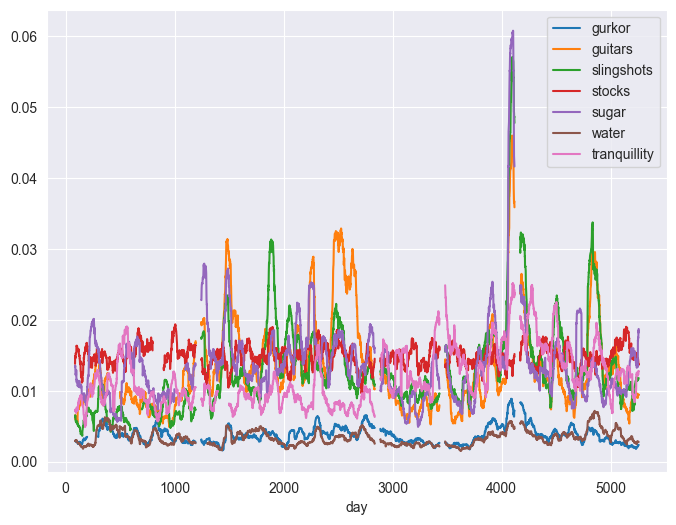

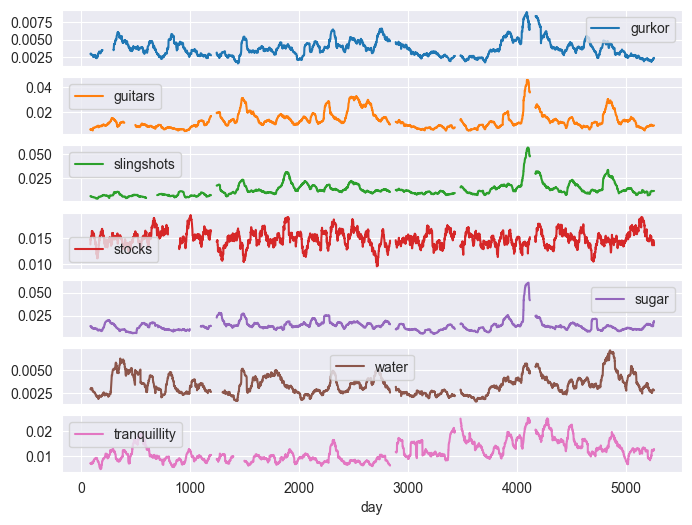

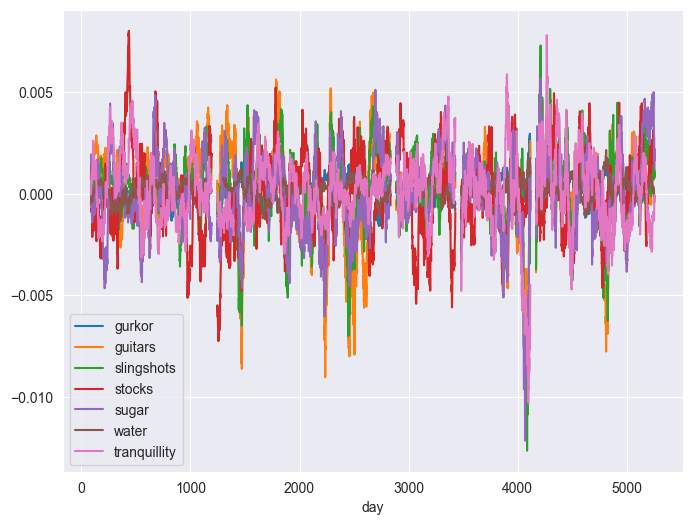

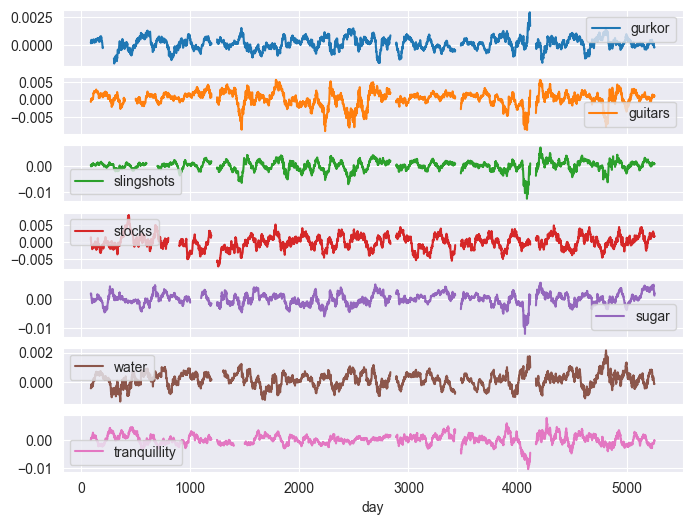

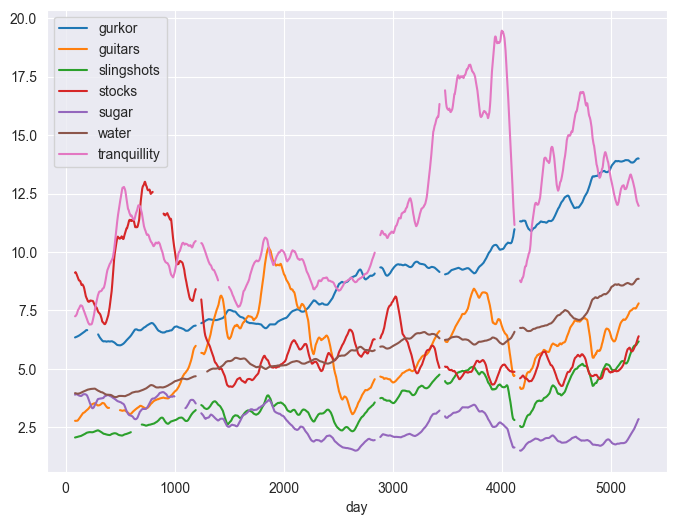

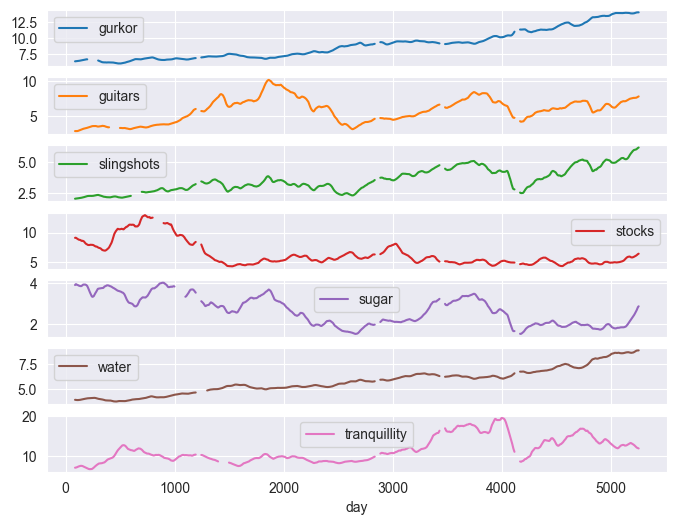

In [13]:
print("Rolling volatility (50 days):")
rolling_volatility = log_returns.rolling(window=50).std()
rolling_volatility.plot(figsize=(8,6))
rolling_volatility.plot(figsize=(8,6), subplots=True)

print("Rolling mean on log returns (50  days):")
rolling_mean = log_returns.rolling(window=50 ).mean()
rolling_mean.plot(figsize=(8,6))
rolling_mean.plot(figsize=(8,6), subplots=True)

print("Rolling mean on filtered data (50  days):")
rolling_mean = data_filtered.rolling(window=50 ).mean()
rolling_mean.plot(figsize=(8,6))
rolling_mean.plot(figsize=(8,6), subplots=True)


#### MSTL DECOMPOSITION

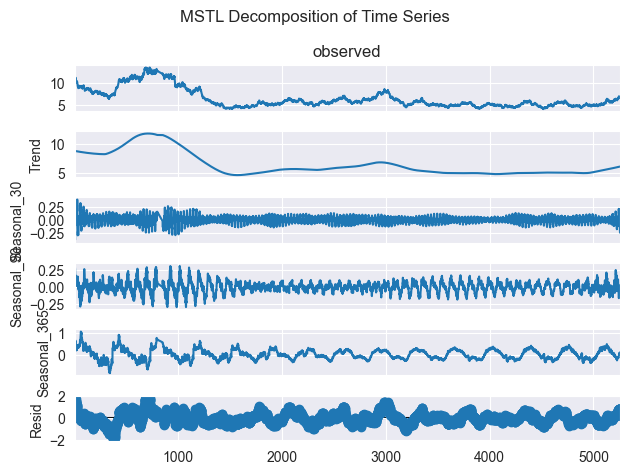

In [14]:
from statsmodels.tsa.seasonal import MSTL

series = data_filtered["stocks"].dropna()

mstl = MSTL(series, periods=[30,90,365])
result = mstl.fit()
result.plot()
plt.suptitle("MSTL Decomposition of Time Series")
plt.tight_layout()
plt.show()


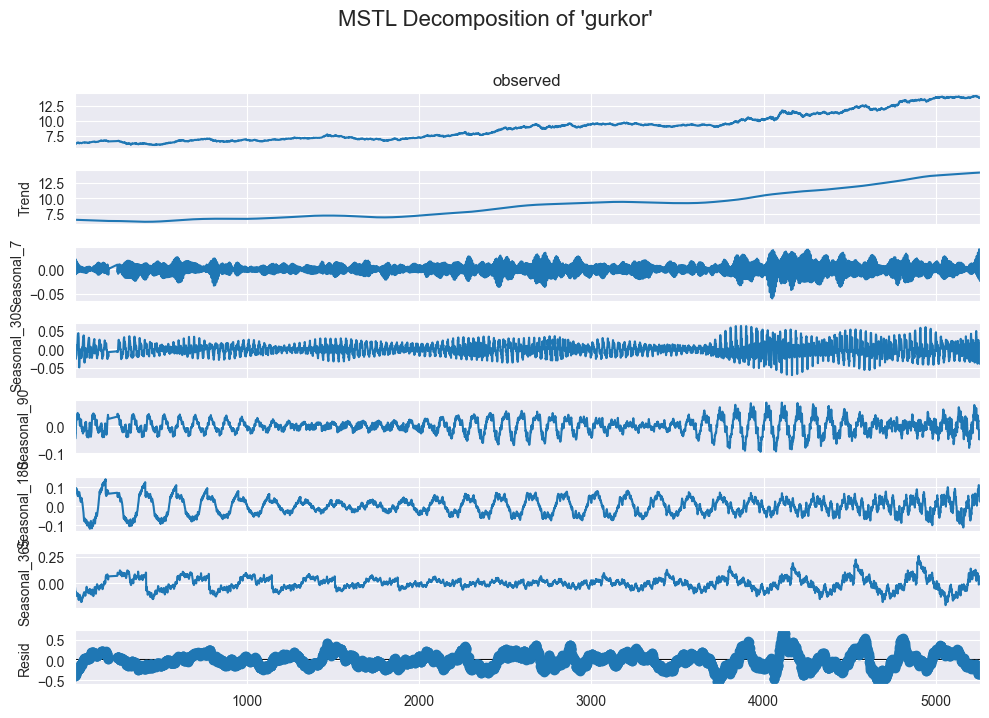

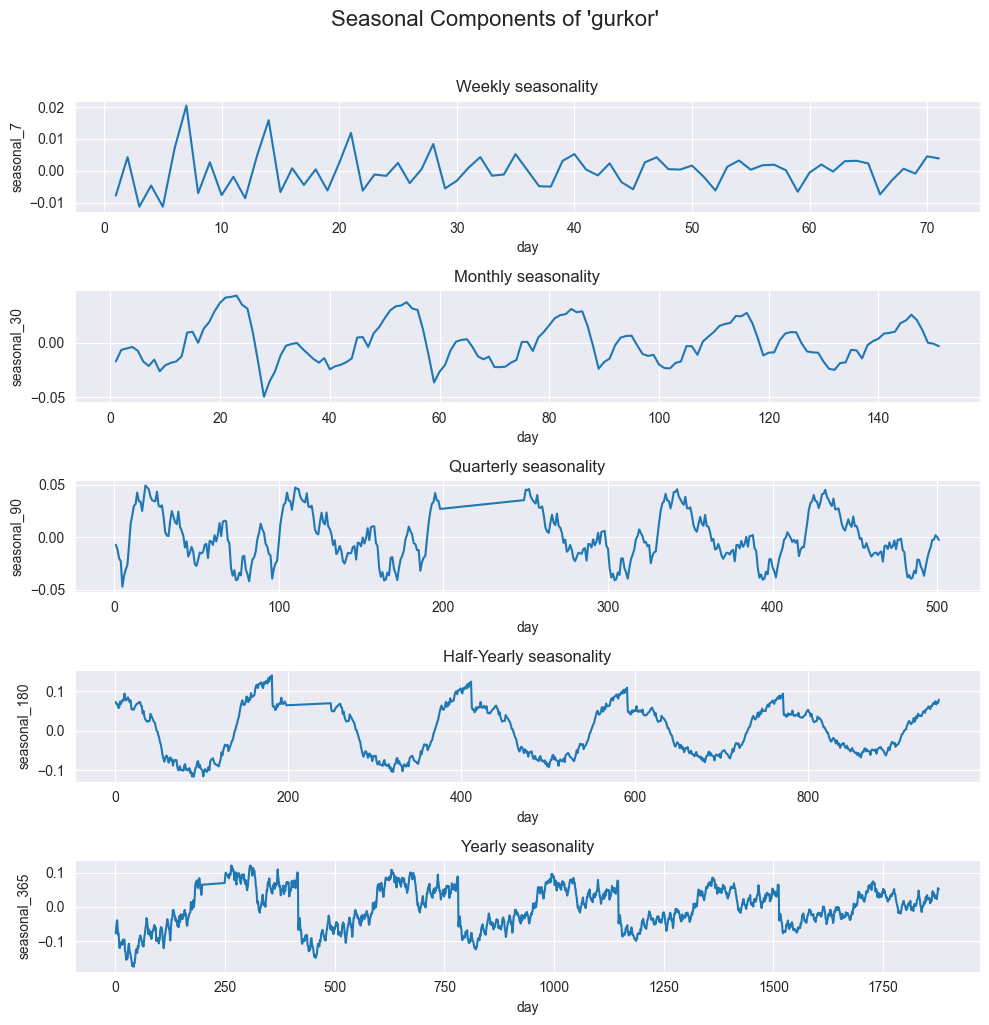

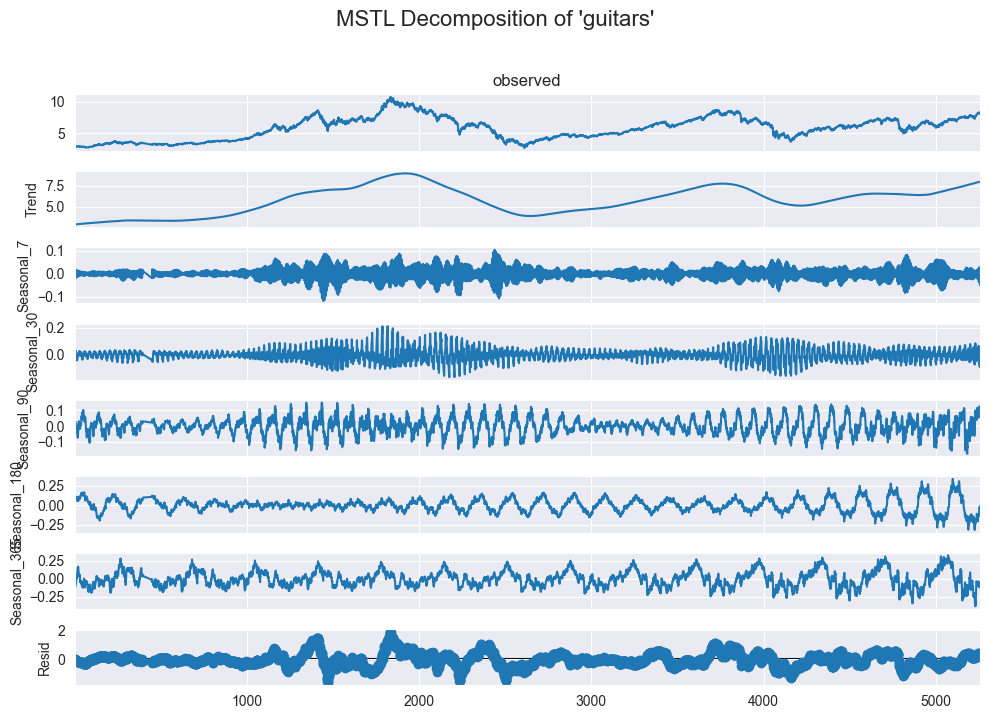

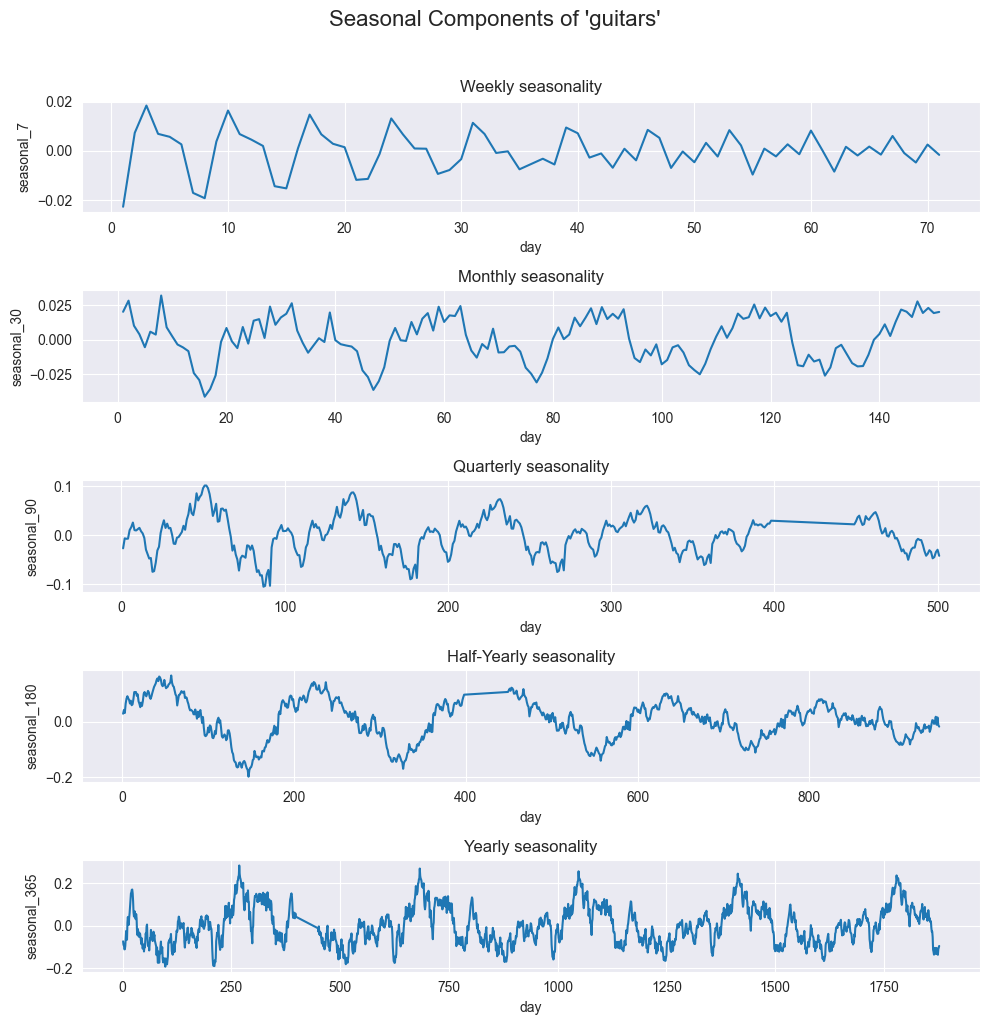

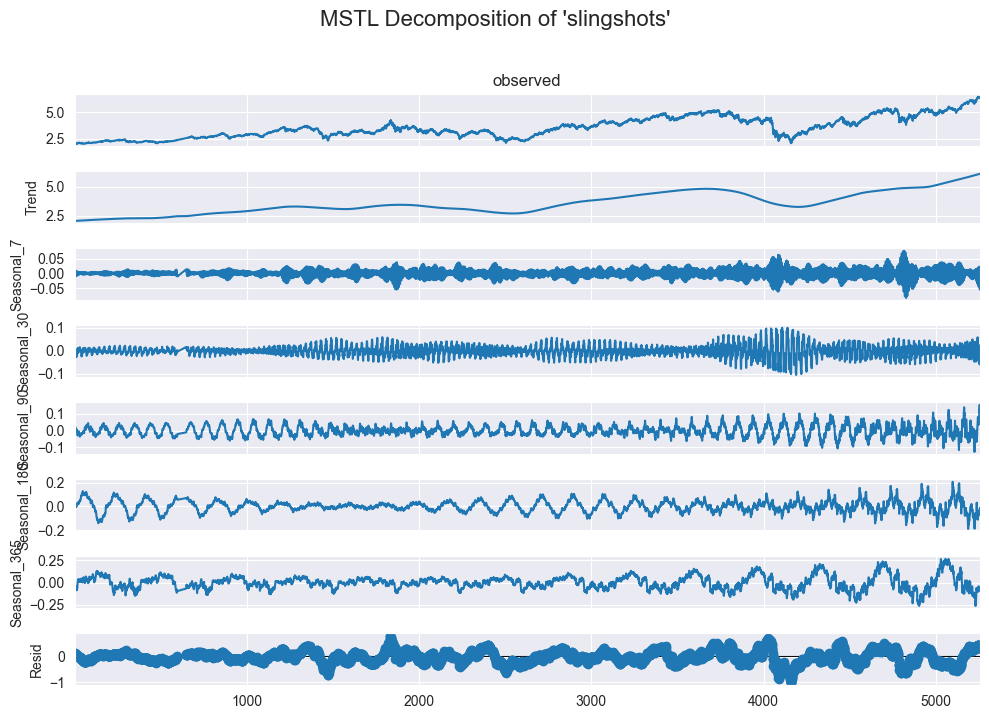

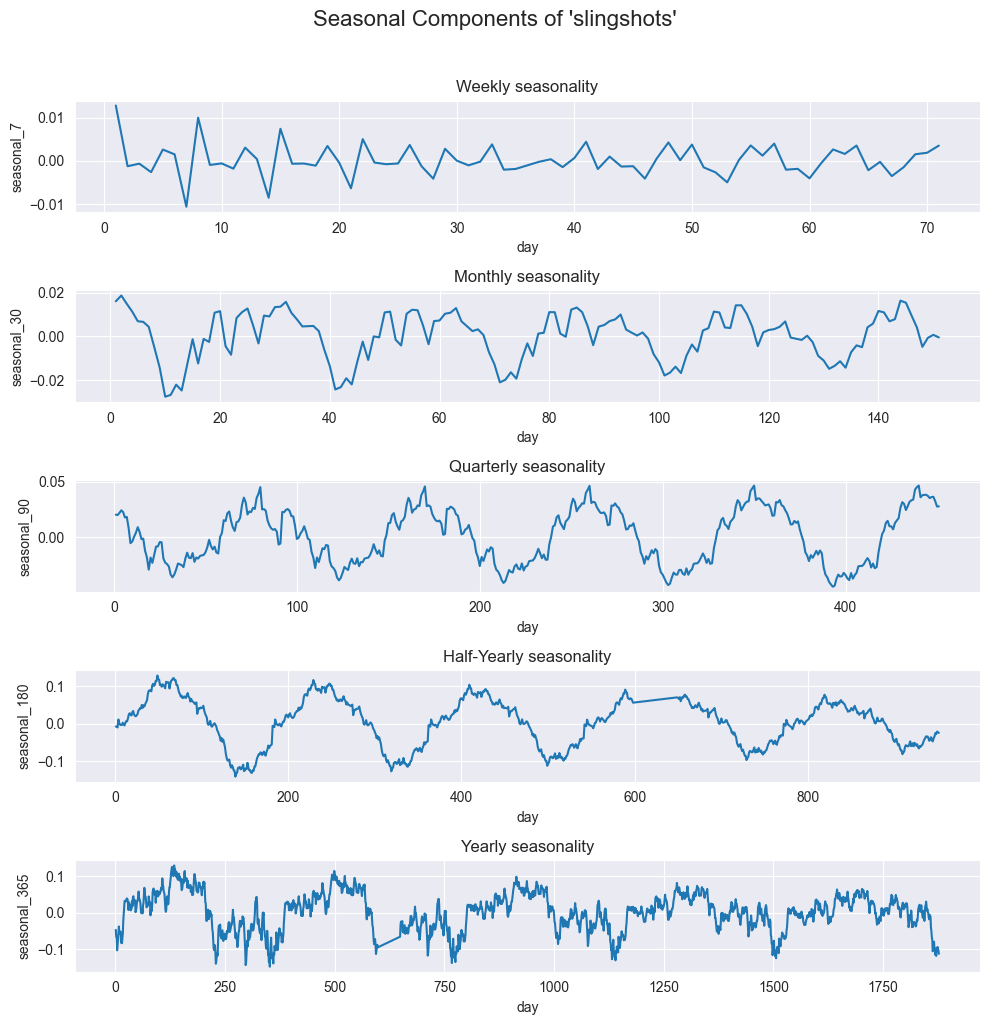

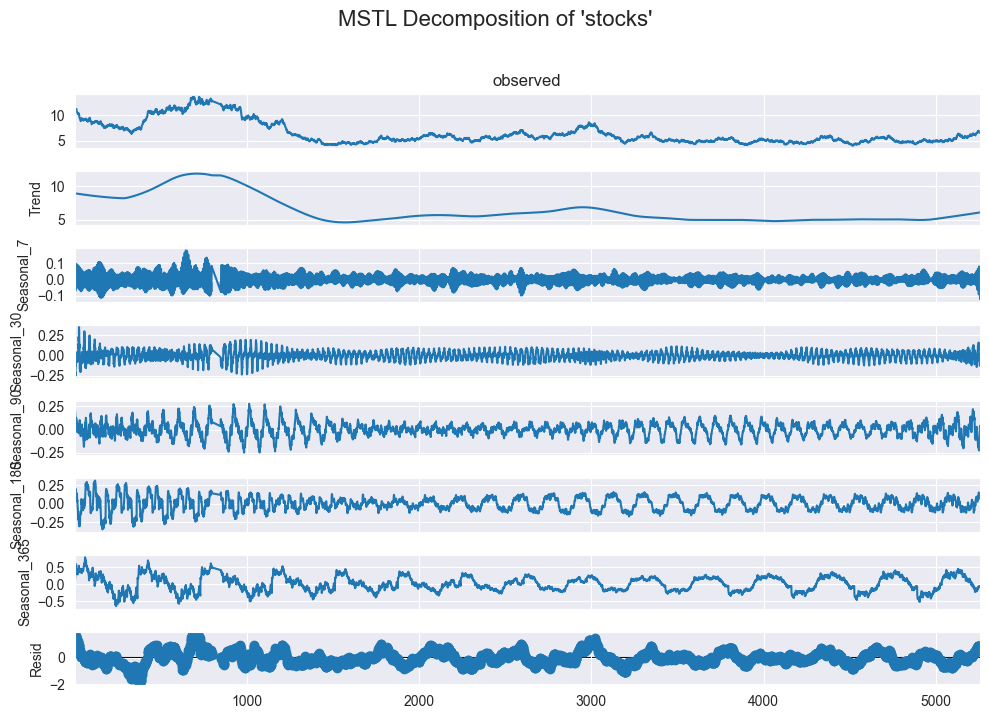

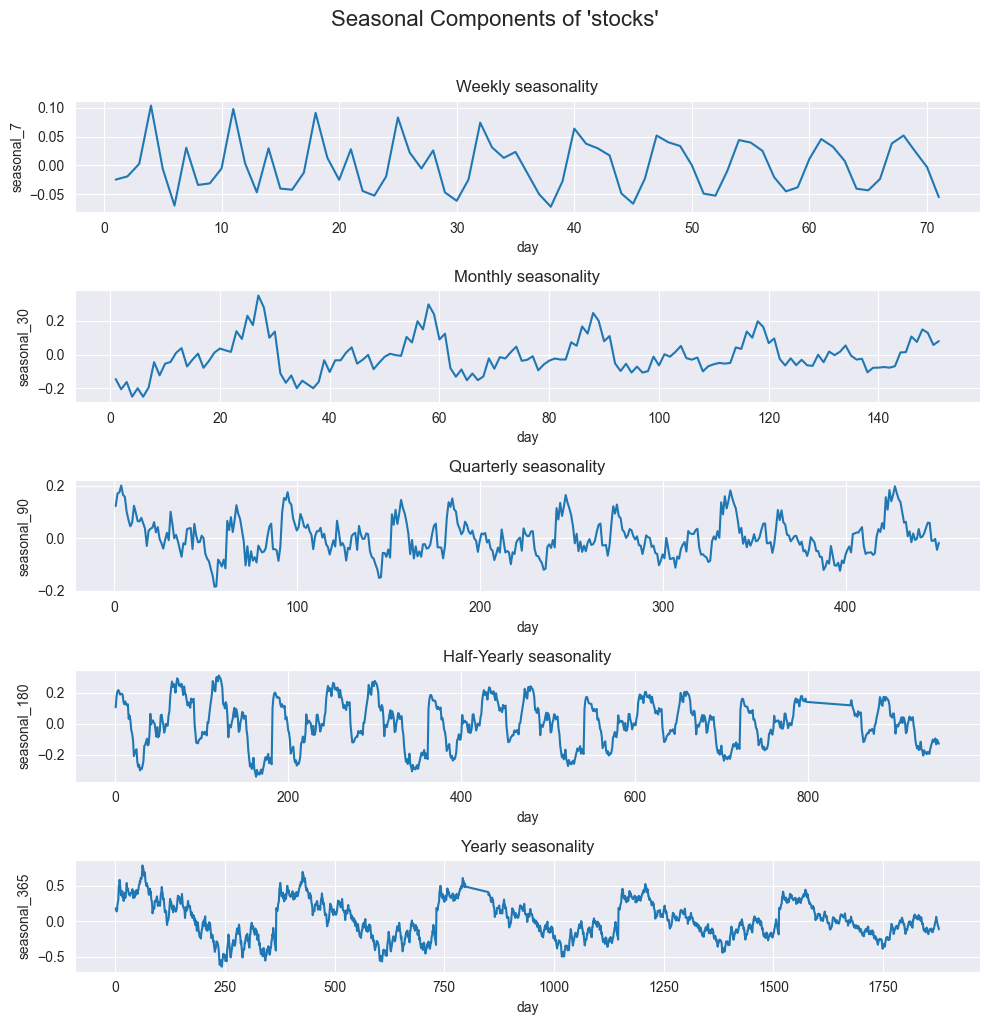

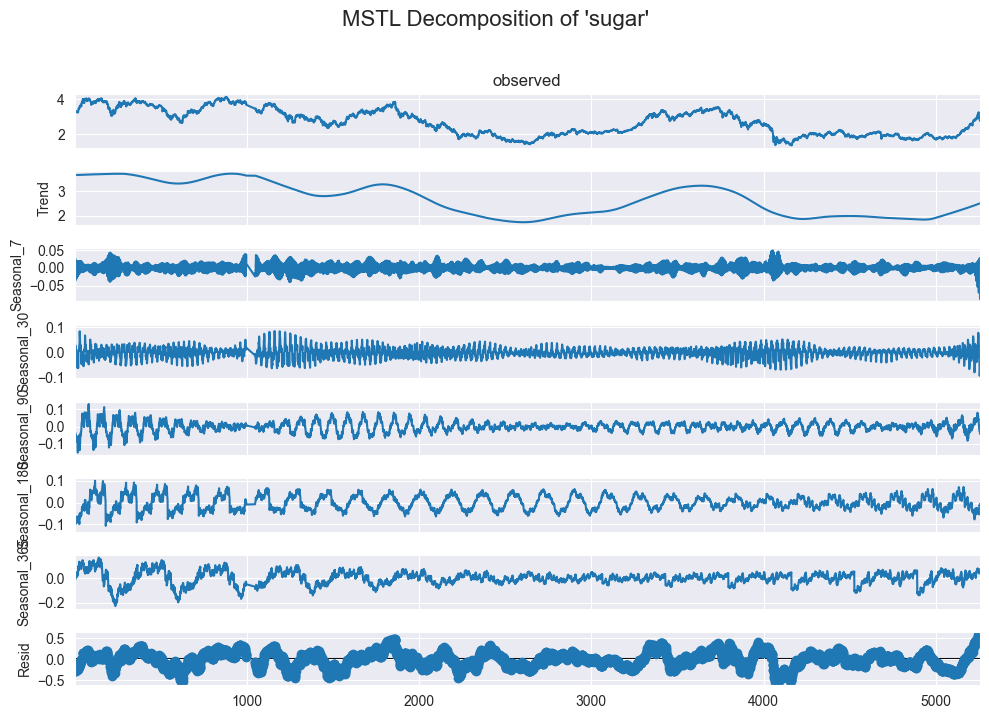

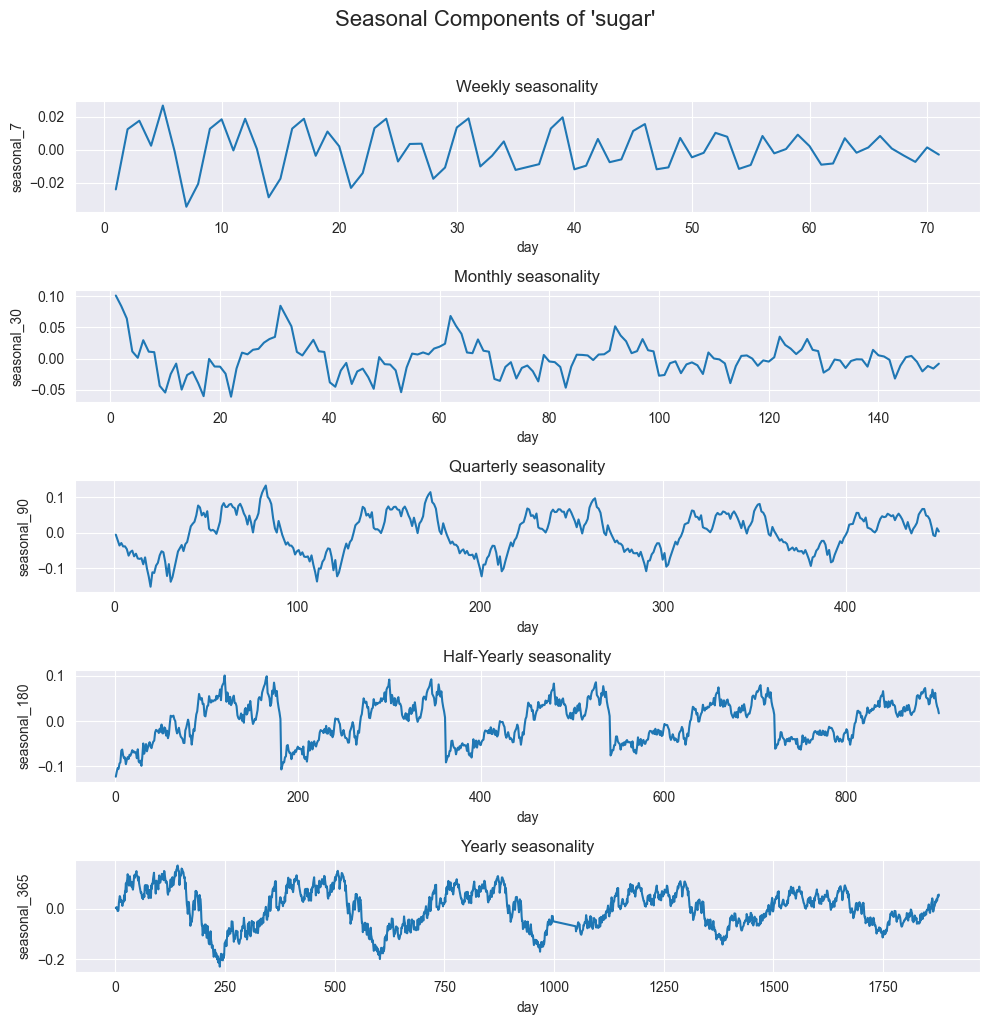

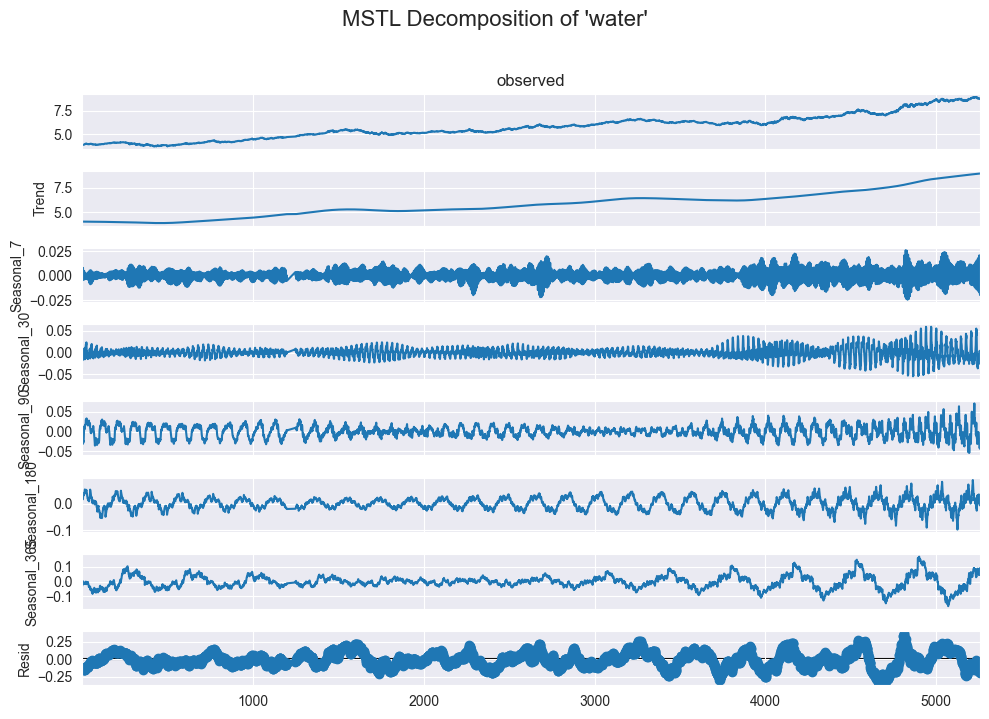

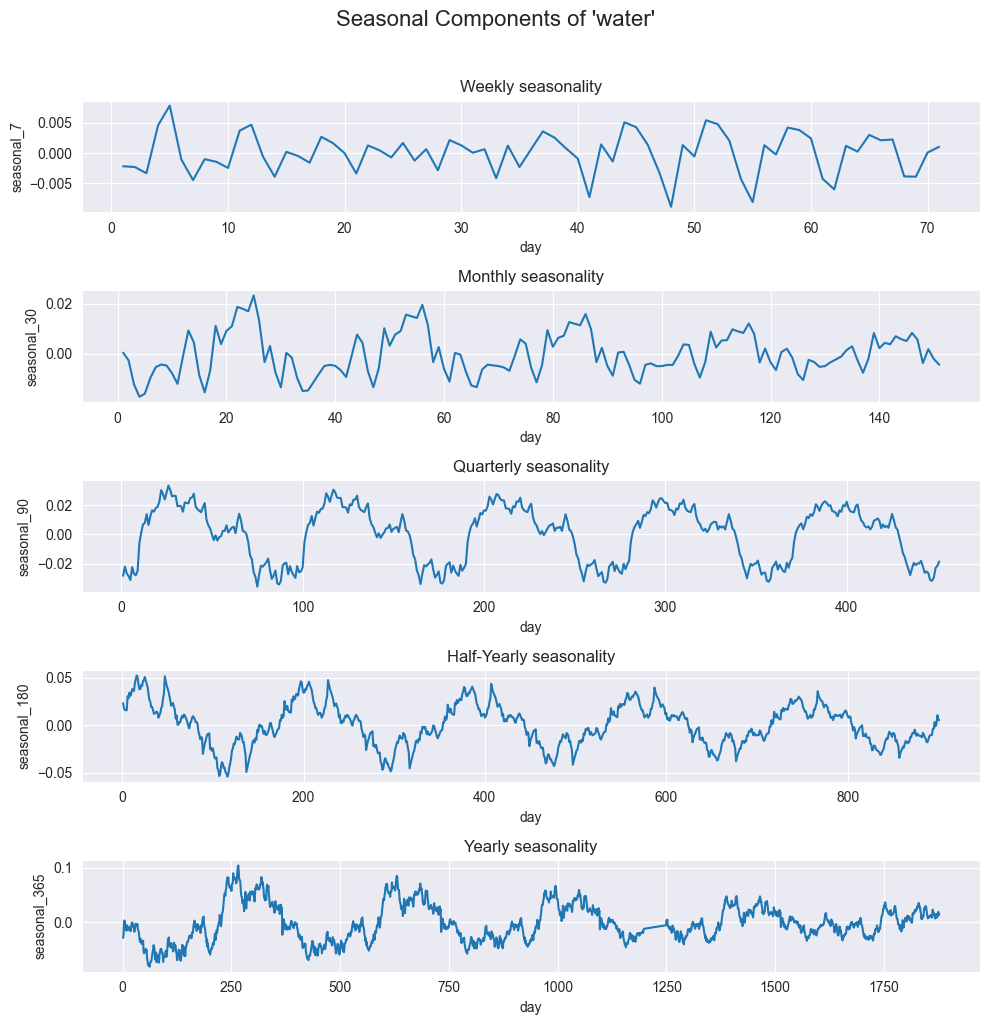

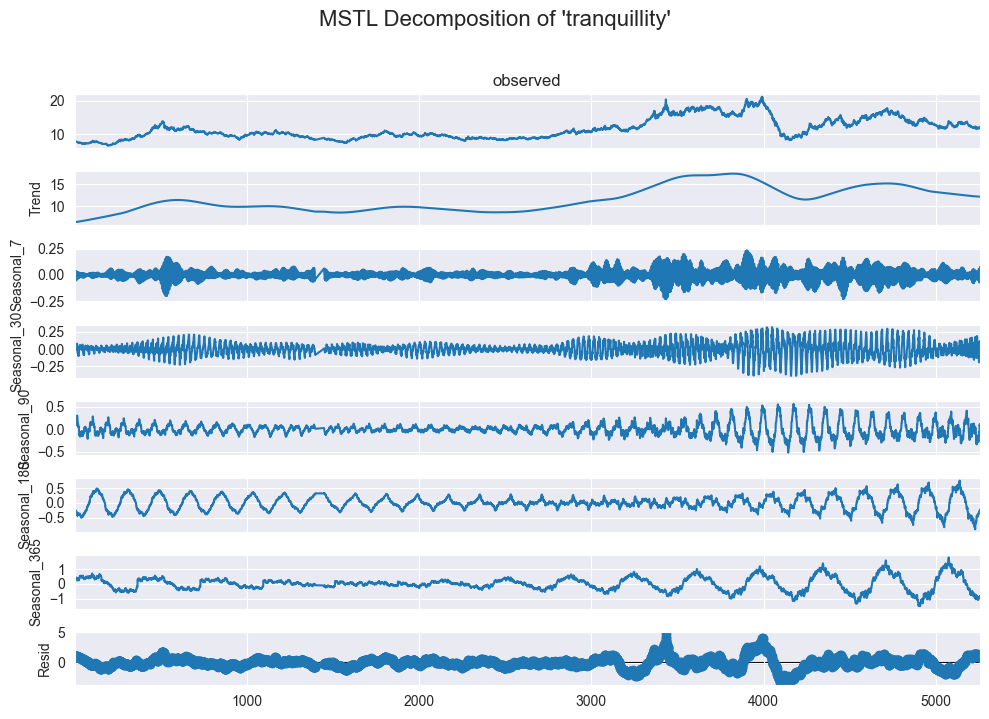

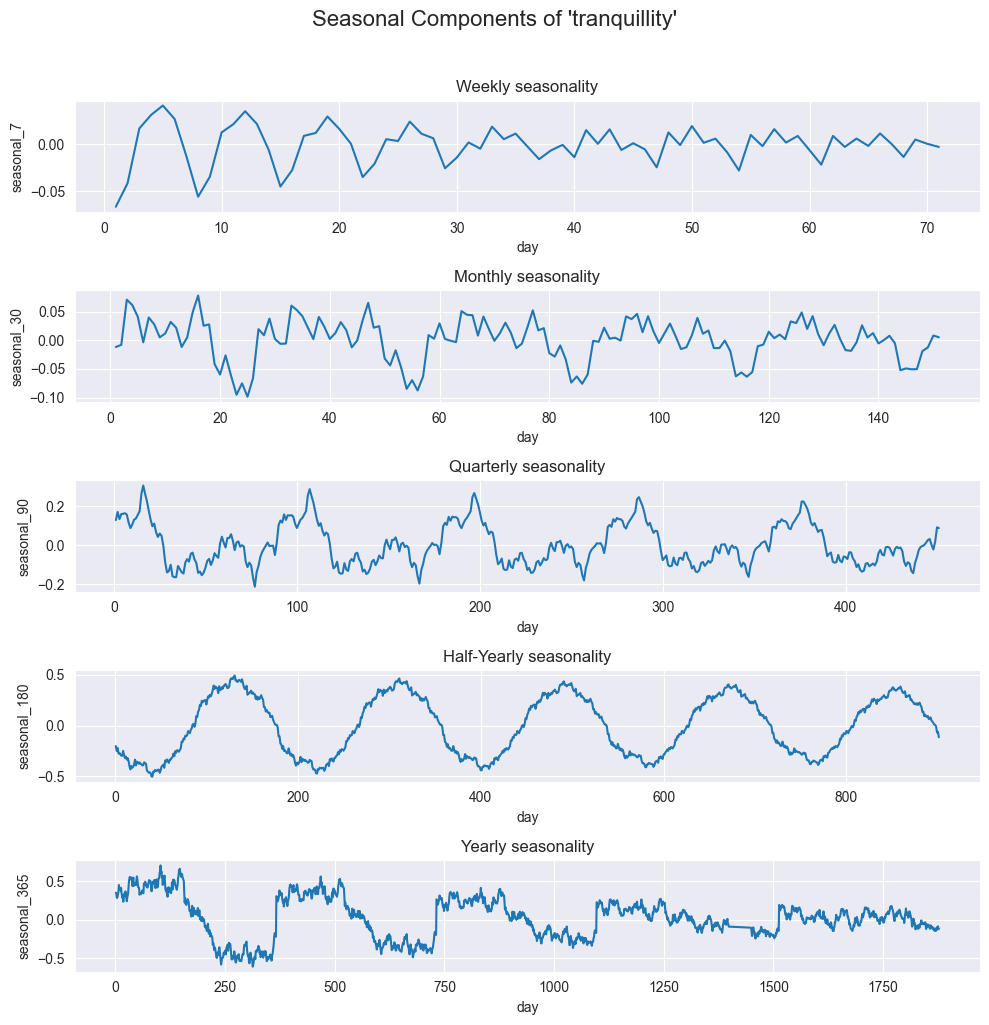

In [20]:
periods = [7, 30,90, 180, 365]  # Weekly, monthly, quaterly, yearly
sns.set_style("darkgrid")

# Loop over each series
for col in data_filtered.columns:
    series = data_filtered[col].dropna()
    if len(series) < max(periods) * 2:
        print(f"Skipping '{col}' — not enough data.")
        continue

    try:
        mstl = MSTL(series, periods=periods)
        result = mstl.fit()

        # Plotting
        fig = result.plot()
        fig.set_size_inches(10, 7)
        fig.suptitle(f"MSTL Decomposition of '{col}'", fontsize=16, y=1.02)
        fig.fontsize = 6

        
        #plt.xlim(1,7*20)
        #plt.axis('equal')

        plt.tight_layout()
        plt.show()
        

        # Plotting seasonal components separately and zoomed in
        fig1, ax1 = plt.subplots(nrows=5, figsize=[10,10])
        fig1.suptitle(f"Seasonal Components of '{col}'", fontsize=16, y=1.02)
        result.seasonal["seasonal_7"].iloc[:7*10].plot(ax=ax1[0])
        ax1[0].set_ylabel("seasonal_7")
        ax1[0].set_title("Weekly seasonality")

        result.seasonal["seasonal_30"].iloc[:30*5].plot(ax=ax1[1])
        ax1[1].set_ylabel("seasonal_30")
        ax1[1].set_title("Monthly seasonality")

        result.seasonal["seasonal_90"].iloc[:90*5].plot(ax=ax1[2])
        ax1[2].set_ylabel("seasonal_90")
        ax1[2].set_title("Quarterly seasonality")

        result.seasonal["seasonal_180"].iloc[:180*5].plot(ax=ax1[3])
        ax1[3].set_ylabel("seasonal_180")
        ax1[3].set_title("Half-Yearly seasonality")

        result.seasonal["seasonal_365"].iloc[:365*5].plot(ax=ax1[4])
        ax1[4].set_ylabel("seasonal_365")
        ax1[4].set_title("Yearly seasonality")

        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"Could not decompose '{col}': {e}")

Försöker kolla lite noggrannare på seasonality. Verkar ändå som att weekly delen kan ignoreras

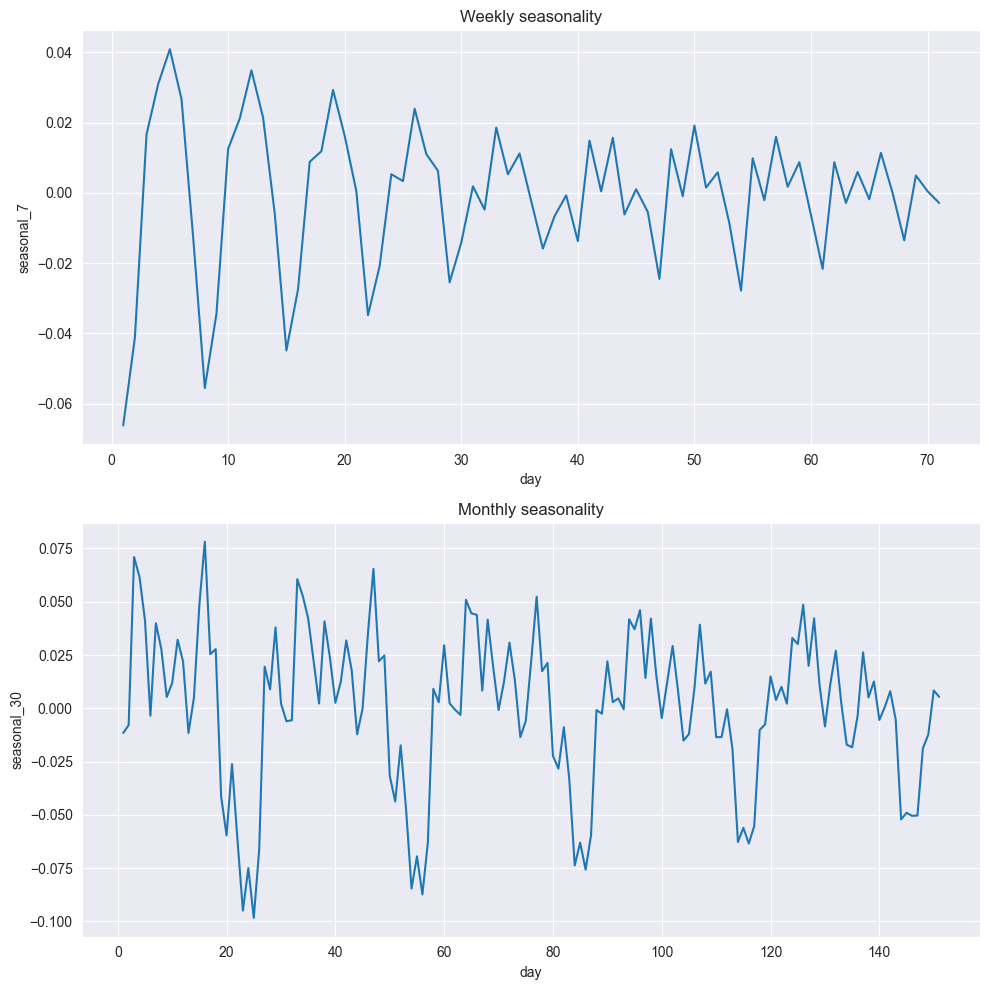

In [16]:
fig1, ax1 = plt.subplots(nrows=2, figsize=[10,10])
result.seasonal["seasonal_7"].iloc[:7*10].plot(ax=ax1[0])
ax1[0].set_ylabel("seasonal_7")
ax1[0].set_title("Weekly seasonality")

result.seasonal["seasonal_30"].iloc[:30*5].plot(ax=ax1[1])
ax1[1].set_ylabel("seasonal_30")
ax1[1].set_title("Monthly seasonality")

plt.tight_layout()
plt.show()

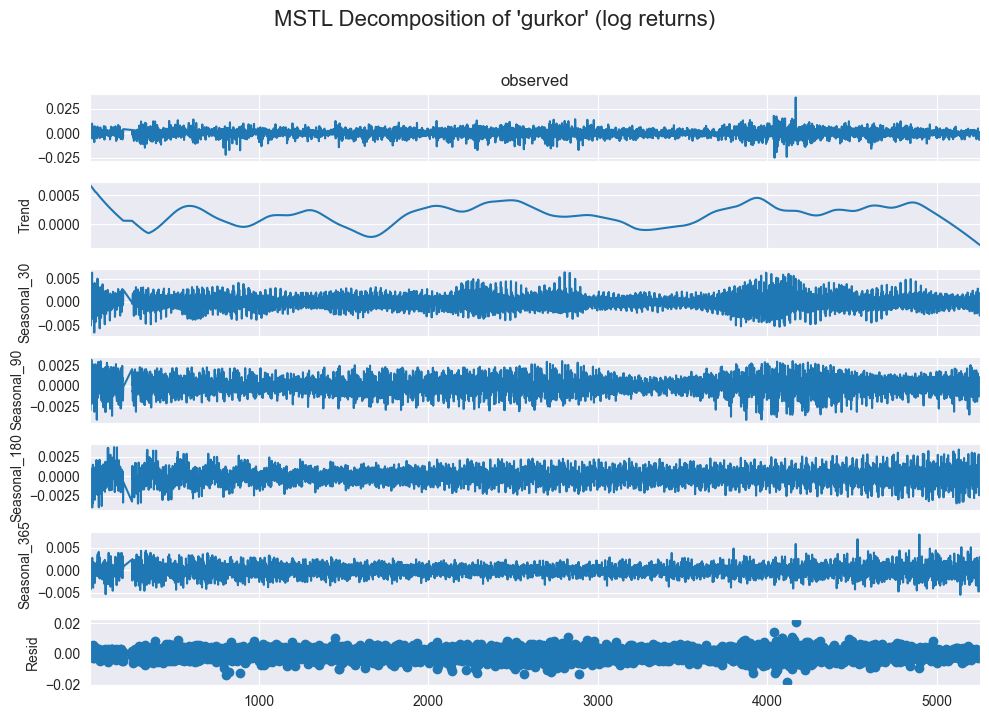

Could not decompose 'gurkor': 'seasonal_7'


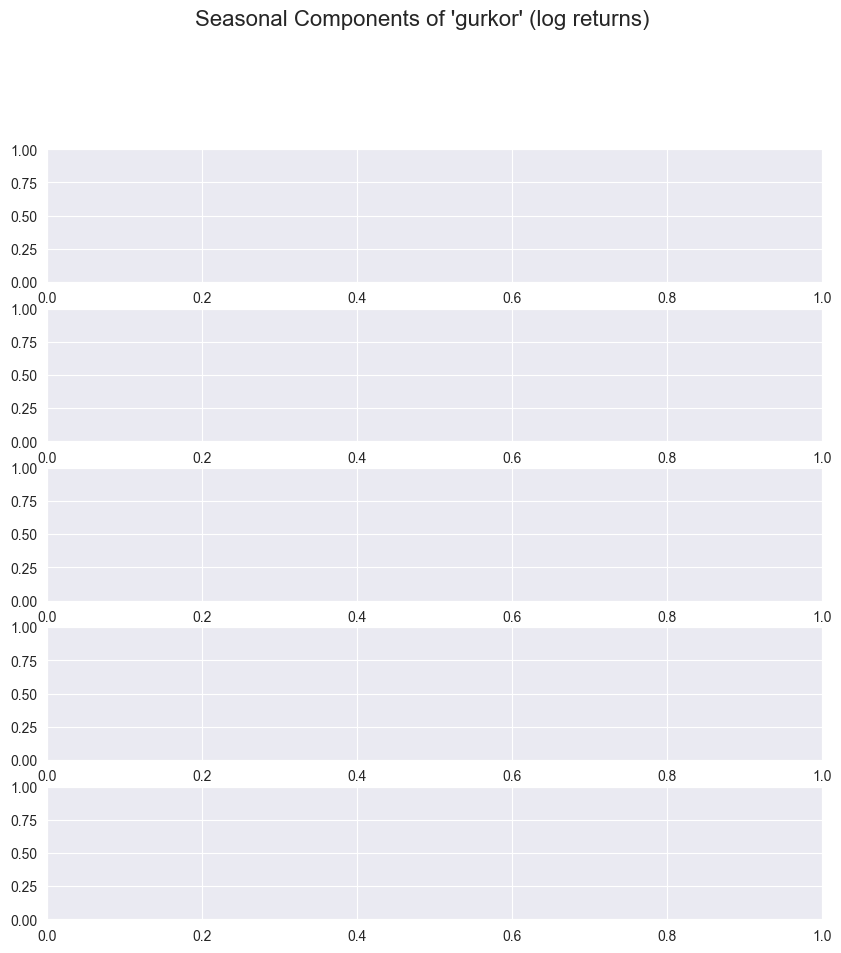

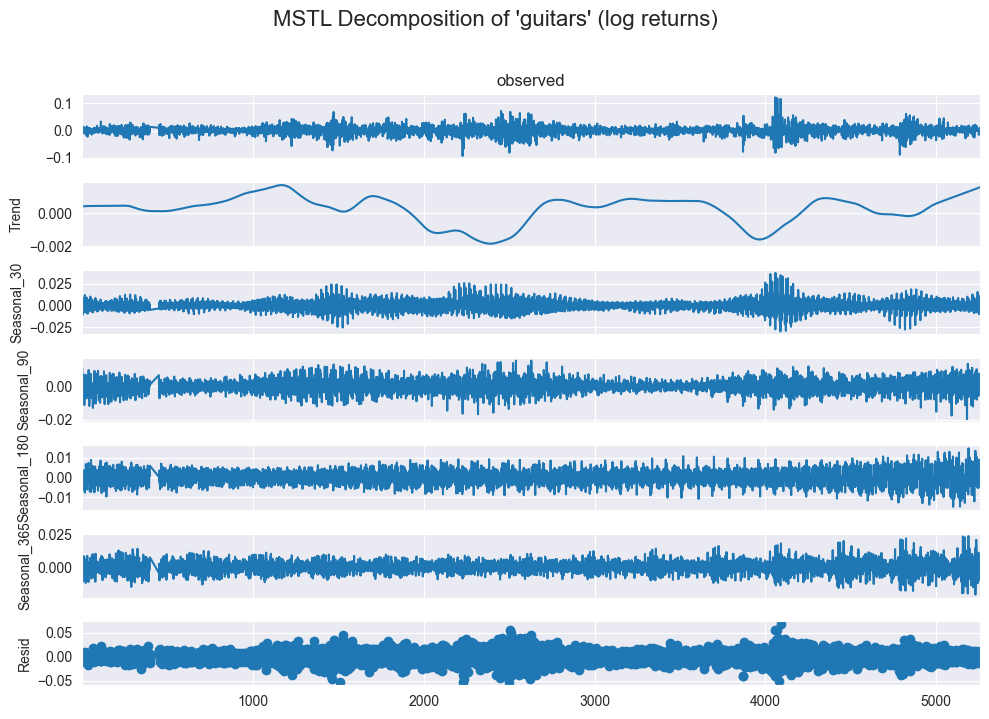

Could not decompose 'guitars': 'seasonal_7'


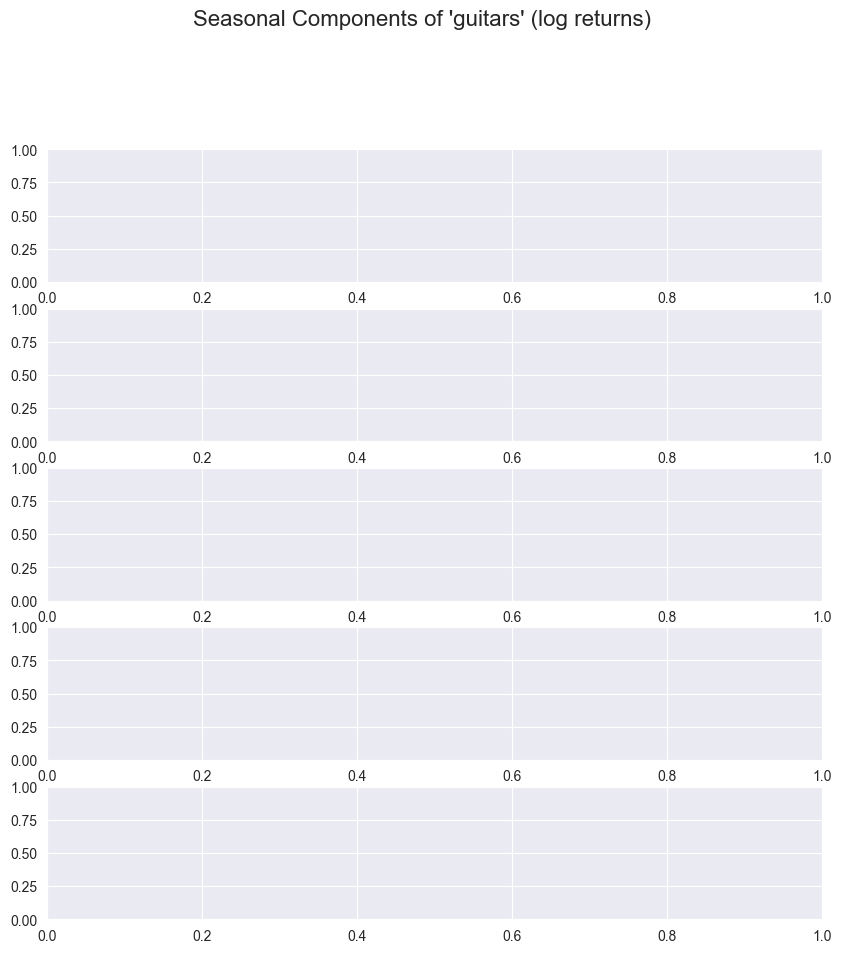

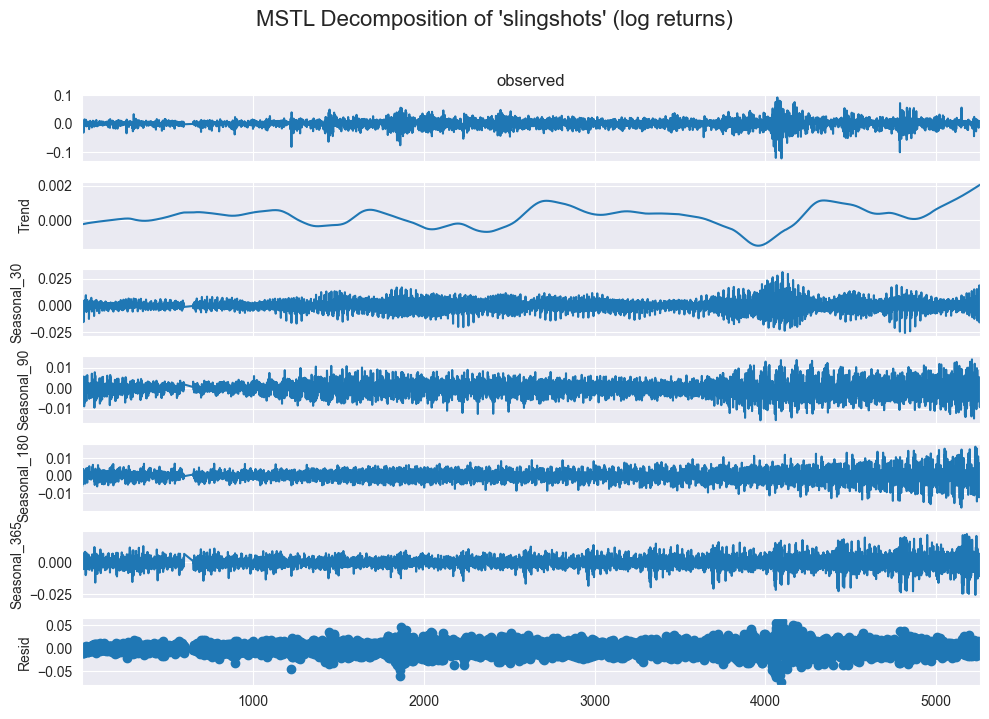

Could not decompose 'slingshots': 'seasonal_7'


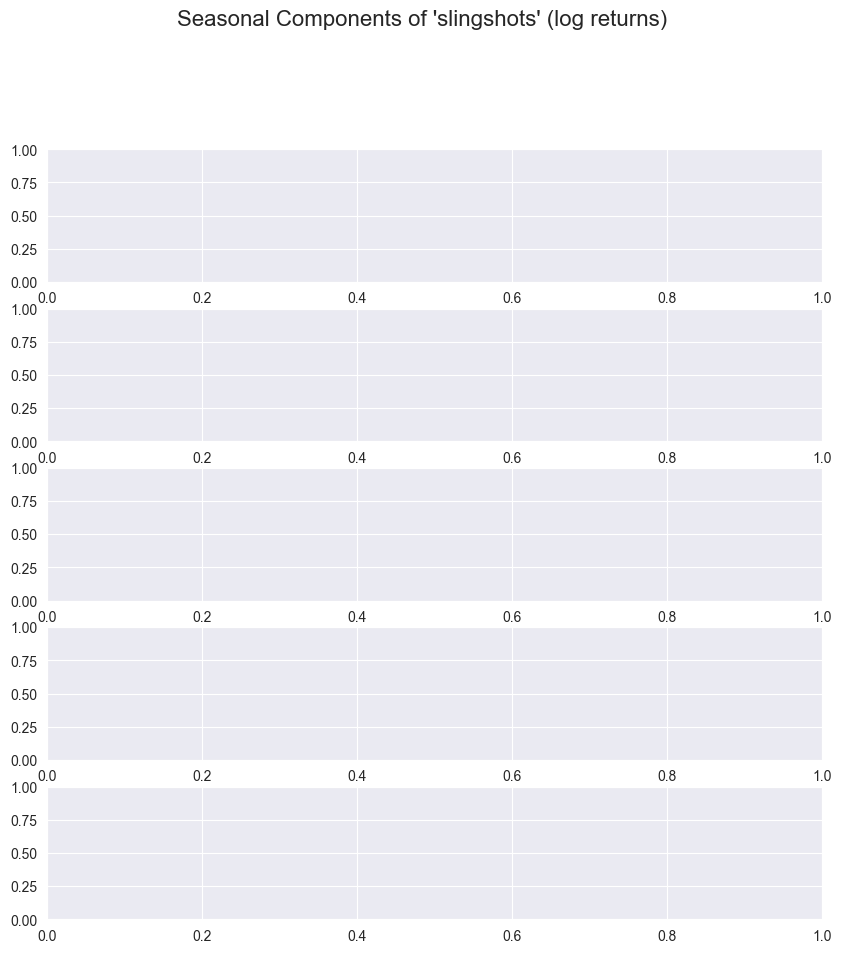

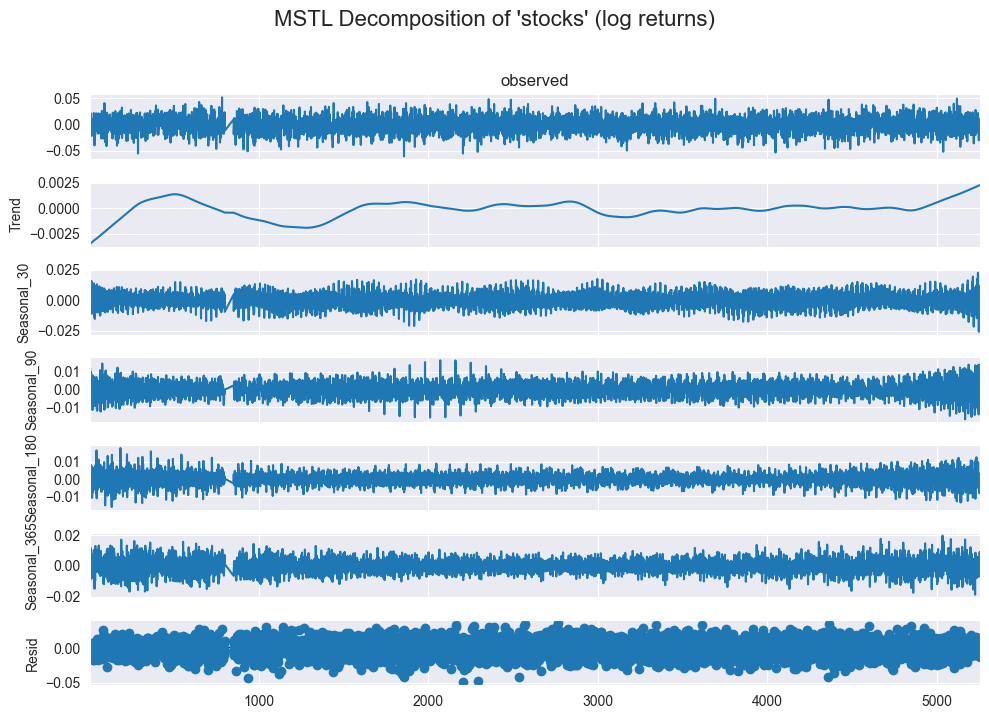

Could not decompose 'stocks': 'seasonal_7'


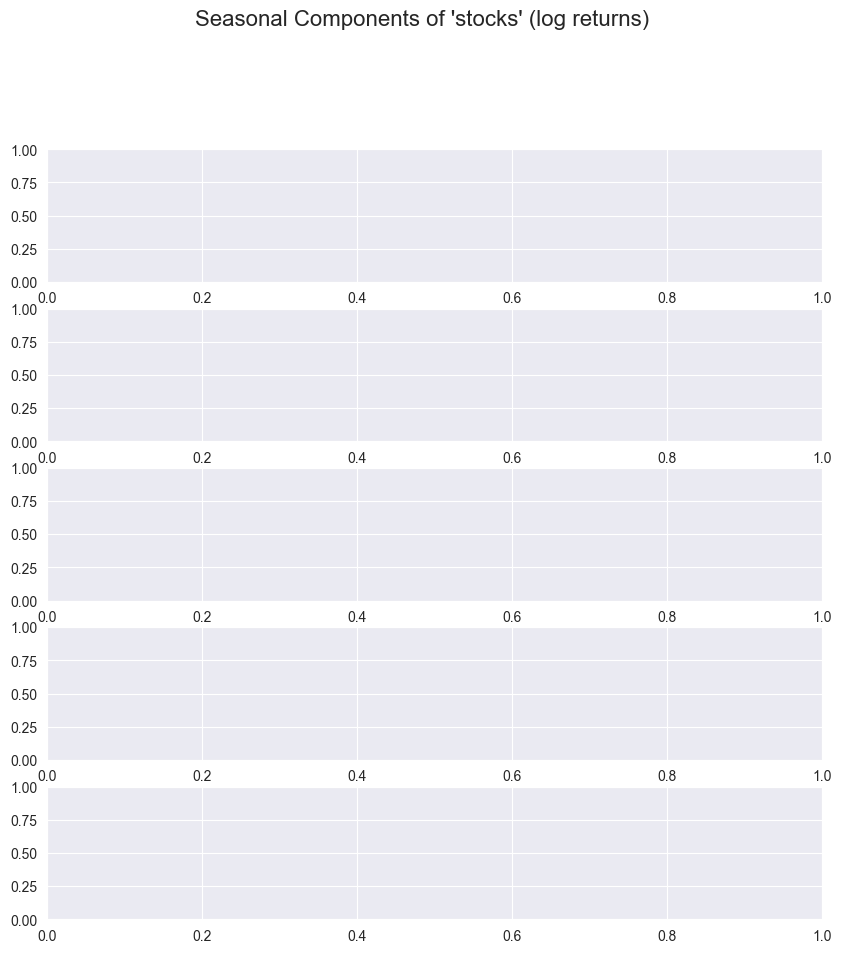

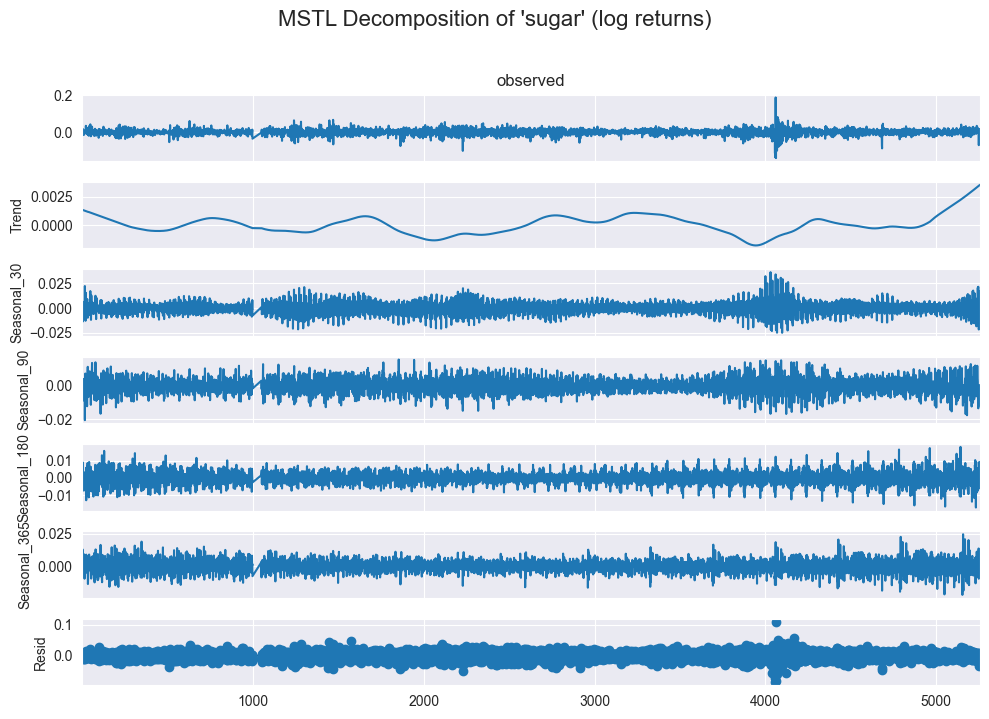

Could not decompose 'sugar': 'seasonal_7'


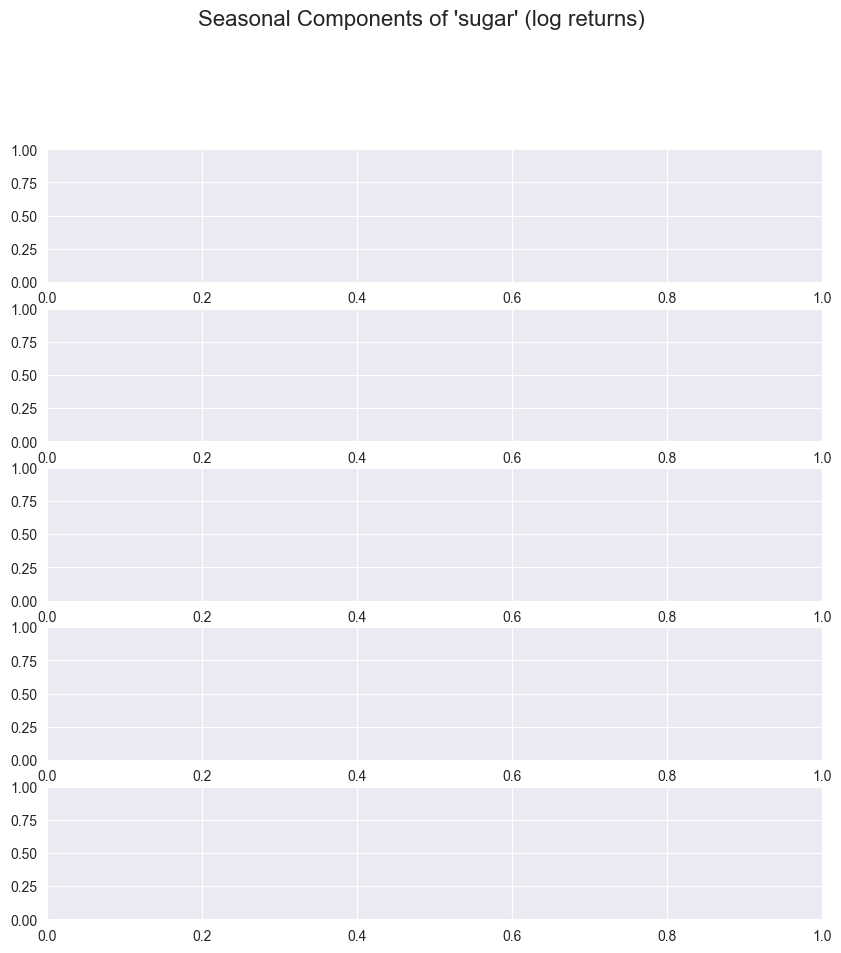

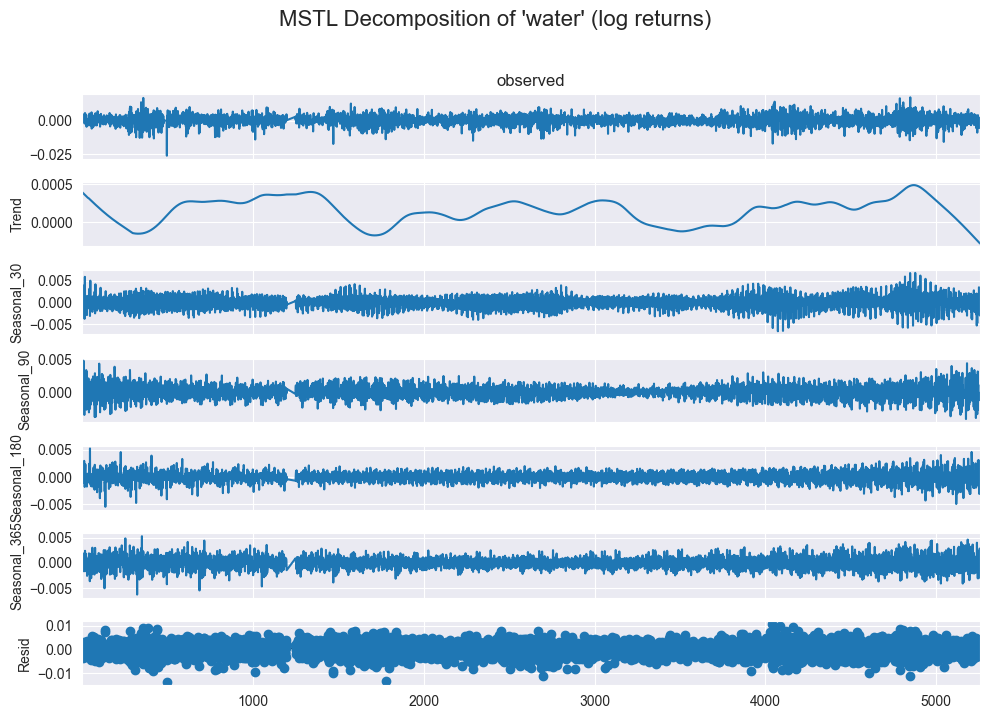

Could not decompose 'water': 'seasonal_7'


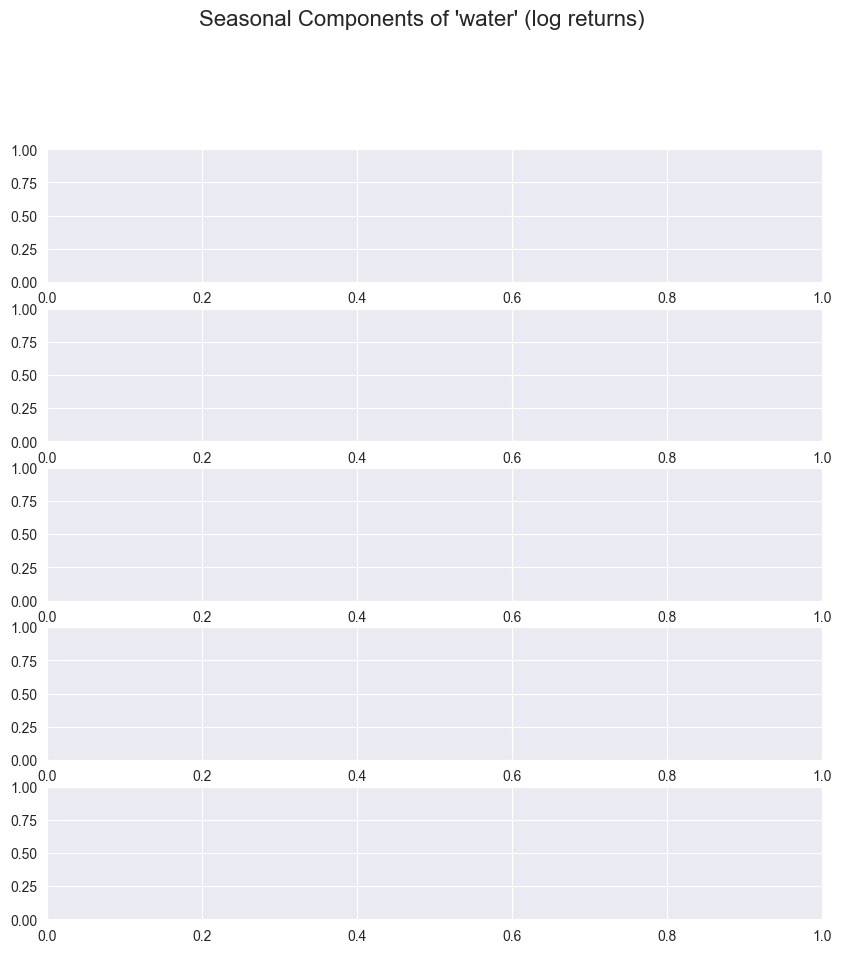

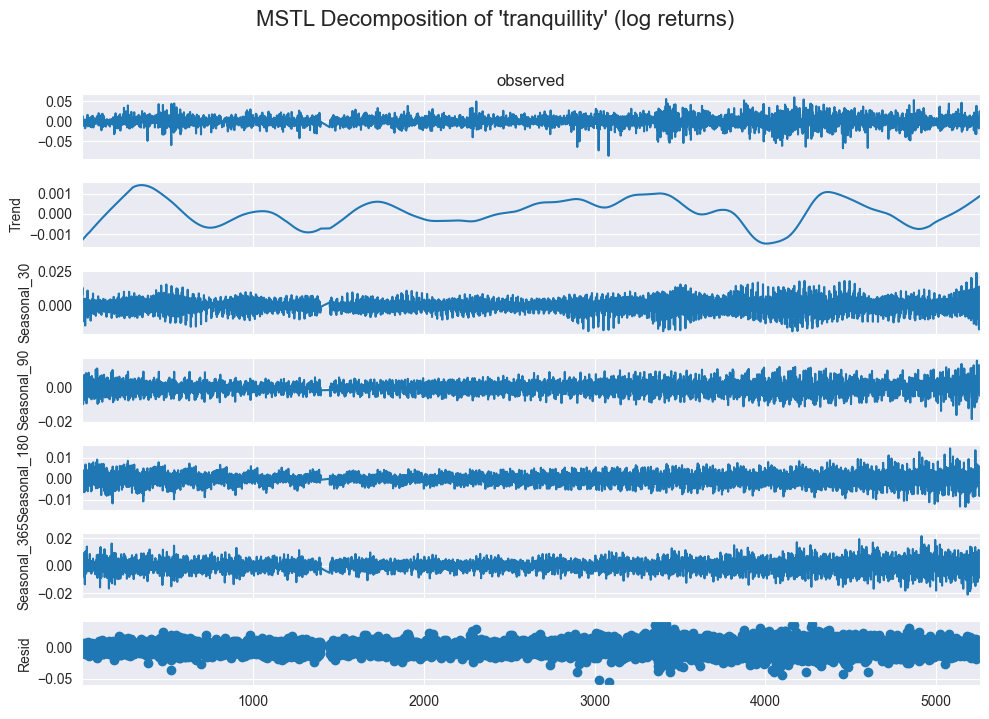

Could not decompose 'tranquillity': 'seasonal_7'


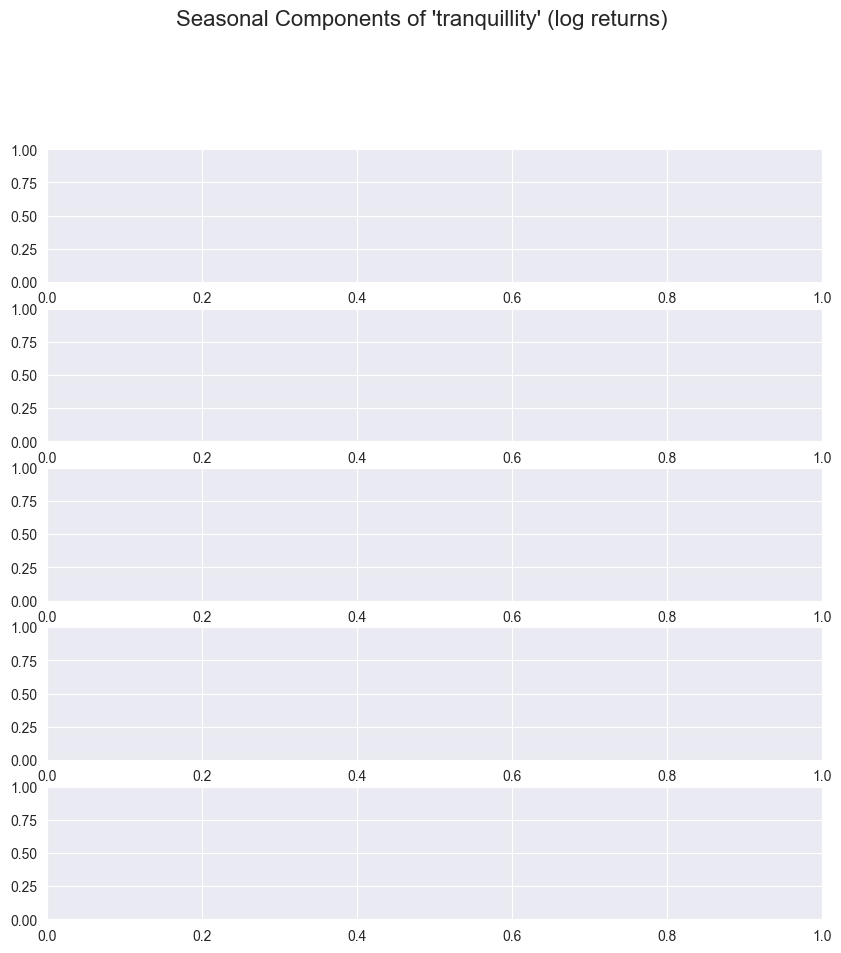

In [17]:
periods = [30,90, 180, 365]  # Weekly, monthly, quaterly, yearly
sns.set_style("darkgrid")

# Loop over each series
for col in log_returns.columns:
    series = log_returns[col].dropna()
    if len(series) < max(periods) * 2:
        print(f"Skipping '{col}' — not enough data.")
        continue

    try:
        mstl = MSTL(series, periods=periods)
        result = mstl.fit()

        # Plotting
        fig = result.plot()
        fig.set_size_inches(10, 7)
        fig.suptitle(f"MSTL Decomposition of '{col}' (log returns)", fontsize=16, y=1.02)
        fig.fontsize = 6

        
        #plt.xlim(1,7*20)
        #plt.axis('equal')

        plt.tight_layout()
        plt.show()
        

        # Plotting seasonal components separately and zoomed in
        fig1, ax1 = plt.subplots(nrows=5, figsize=[10,10])
        fig1.suptitle(f"Seasonal Components of '{col}' (log returns)", fontsize=16, y=1.02)
        result.seasonal["seasonal_7"].iloc[:7*10].plot(ax=ax1[0])
        ax1[0].set_ylabel("seasonal_7")
        ax1[0].set_title("Weekly seasonality")

        result.seasonal["seasonal_30"].iloc[:30*5].plot(ax=ax1[1])
        ax1[1].set_ylabel("seasonal_30")
        ax1[1].set_title("Monthly seasonality")

        result.seasonal["seasonal_90"].iloc[:90*5].plot(ax=ax1[2])
        ax1[2].set_ylabel("seasonal_90")
        ax1[2].set_title("Quarterly seasonality")

        result.seasonal["seasonal_180"].iloc[:365*5].plot(ax=ax1[3])
        ax1[3].set_ylabel("seasonal_180")
        ax1[3].set_title("Half-Yearly seasonality")

        result.seasonal["seasonal_365"].iloc[:365*5].plot(ax=ax1[4])
        ax1[4].set_ylabel("seasonal_365")
        ax1[4].set_title("Yearly seasonality")

        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"Could not decompose '{col}': {e}")




#### Jag tror jag hade sagt att monthly, quarterly, och yearly seasonality är relevanta för oss efter att kollat på STL decompen av priserna.

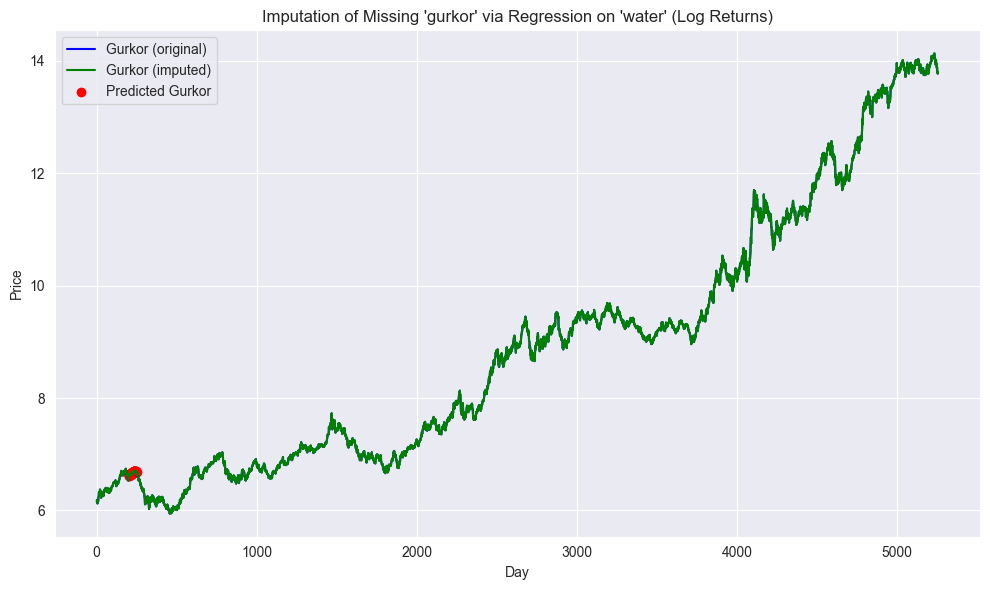

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Step 1: Compute log returns
log_returns = np.log(data_filtered / data_filtered.shift(1))

# Step 2: Prepare regression model using non-missing pairs
df_non_missing = log_returns.dropna(subset=['gurkor', 'water'])
X_train = df_non_missing['water'].values.reshape(-1, 1)
Y_train = df_non_missing['gurkor'].values.reshape(-1, 1)

model = LinearRegression()
model.fit(X_train, Y_train)

# Step 3: Identify where 'gurkor' is missing but 'water' is available
missing_gurk_idx = log_returns[log_returns['gurkor'].isna()].index
valid_predict_rows = log_returns.loc[missing_gurk_idx].dropna(subset=['water'])

# Step 4: Predict missing log returns for 'gurkor'
X_pred = valid_predict_rows['water'].values.reshape(-1, 1)
predicted_returns = model.predict(X_pred)

# Step 5: Impute the predicted log returns
log_returns_imputed = log_returns.copy()
log_returns_imputed.loc[valid_predict_rows.index, 'gurkor'] = predicted_returns.flatten()

# Step 6: Reconstruct the price series from log returns
# Start from first known value
df_imputed = data_filtered.copy()
start_price = df_imputed['gurkor'].dropna().iloc[0]
reconstructed = log_returns_imputed['gurkor'].copy()

# Fill the first known value
reconstructed.iloc[0] = np.log(start_price)

# Reconstruct log price -> price
reconstructed = reconstructed.cumsum().apply(np.exp)

# Replace only the imputed part into the original DataFrame
df_imputed['gurkor_imputed'] = df_imputed['gurkor']
df_imputed.loc[valid_predict_rows.index, 'gurkor_imputed'] = reconstructed.loc[valid_predict_rows.index]


# Plotting
plt.figure(figsize=(10, 6))
df_imputed["gurkor"].plot(label="Gurkor (original)", color='blue')
df_imputed["gurkor_imputed"].plot(label="Gurkor (imputed)", color='green')
plt.scatter(valid_predict_rows.index, df_imputed.loc[valid_predict_rows.index, 'gurkor_imputed'],
            color='red', label="Predicted Gurkor", zorder=1)
plt.title("Imputation of Missing 'gurkor' via Regression on 'water' (Log Returns)")
plt.xlabel("Day")
plt.ylabel("Price")
plt.legend()
plt.tight_layout()
plt.show()


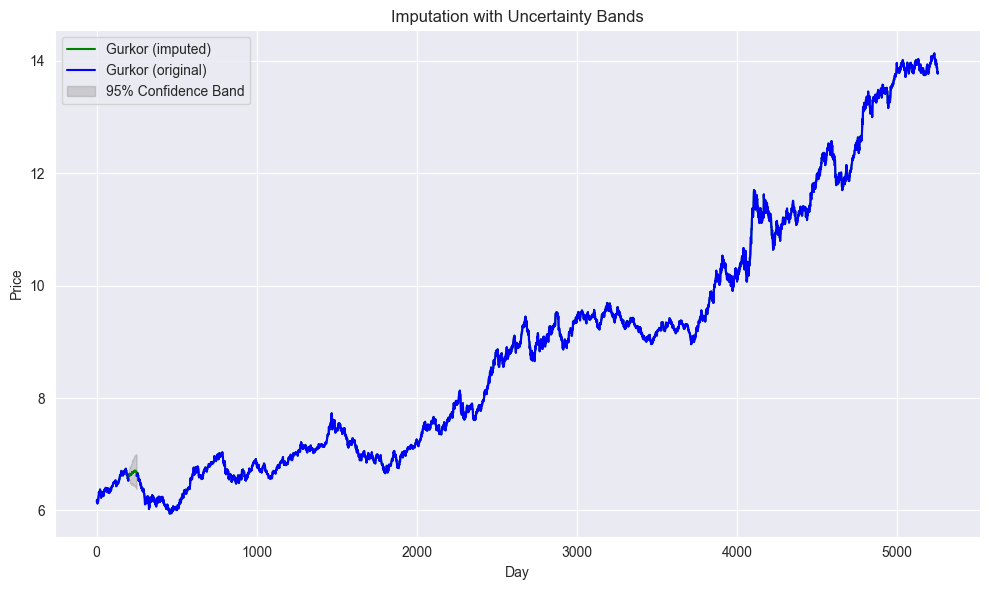

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Step 1: Compute log returns
log_returns = np.log(data_filtered / data_filtered.shift(1))

# Step 2: Prepare regression model
df_non_missing = log_returns.dropna(subset=['gurkor', 'water'])
X_train = df_non_missing['water'].values.reshape(-1, 1)
Y_train = df_non_missing['gurkor'].values.reshape(-1, 1)

model = LinearRegression()
model.fit(X_train, Y_train)

# Step 3: Compute residuals and standard error
residuals = Y_train - model.predict(X_train)
mse = mean_squared_error(Y_train, model.predict(X_train))
X_mean = np.mean(X_train)
n = len(X_train)
SS_xx = np.sum((X_train - X_mean) ** 2)

# Step 4: Identify prediction points
missing_gurk_idx = log_returns[log_returns['gurkor'].isna()].index
valid_predict_rows = log_returns.loc[missing_gurk_idx].dropna(subset=['water'])
X_pred = valid_predict_rows['water'].values.reshape(-1, 1)

# Step 5: Compute predictions and standard errors
predicted_returns = model.predict(X_pred)
pred_se = np.sqrt(mse * (1 + 1/n + (X_pred - X_mean)**2 / SS_xx))  # Standard error

# Step 6: Impute with uncertainty bounds
log_returns_imputed = log_returns.copy()
log_returns_imputed.loc[valid_predict_rows.index, 'gurkor'] = predicted_returns.flatten()

# Step 7: Reconstruct price series with uncertainty
start_price = data_filtered['gurkor'].dropna().iloc[0]
reconstructed = log_returns_imputed['gurkor'].copy()
reconstructed.iloc[0] = np.log(start_price)
reconstructed = reconstructed.cumsum().apply(np.exp)

# Add uncertainty to reconstructed prices
pred_se_cumulative = np.sqrt(np.cumsum(pred_se**2))  # Cumulative uncertainty
lower_bound = reconstructed.loc[valid_predict_rows.index] * np.exp(-1.96 * pred_se_cumulative)
upper_bound = reconstructed.loc[valid_predict_rows.index] * np.exp(1.96 * pred_se_cumulative)

# Step 8: Update DataFrame and plot
df_imputed = data_filtered.copy()
df_imputed['gurkor_imputed'] = df_imputed['gurkor']
df_imputed.loc[valid_predict_rows.index, 'gurkor_imputed'] = reconstructed.loc[valid_predict_rows.index]

plt.figure(figsize=(10, 6))
df_imputed["gurkor_imputed"].plot(label="Gurkor (imputed)", color='green')
df_imputed["gurkor"].plot(label="Gurkor (original)", color='blue')
plt.fill_between(valid_predict_rows.index, lower_bound, upper_bound, 
                 color='gray', alpha=0.3, label="95% Confidence Band")
#plt.scatter(valid_predict_rows.index, df_imputed.loc[valid_predict_rows.index, 'gurkor_imputed'],
 #           color='red', label="Predicted Gurkor", zorder=1)
plt.title("Imputation with Uncertainty Bands")
plt.xlabel("Day")
plt.ylabel("Price")
plt.legend()
plt.tight_layout()
#plt.xlim(180,260)
plt.show()

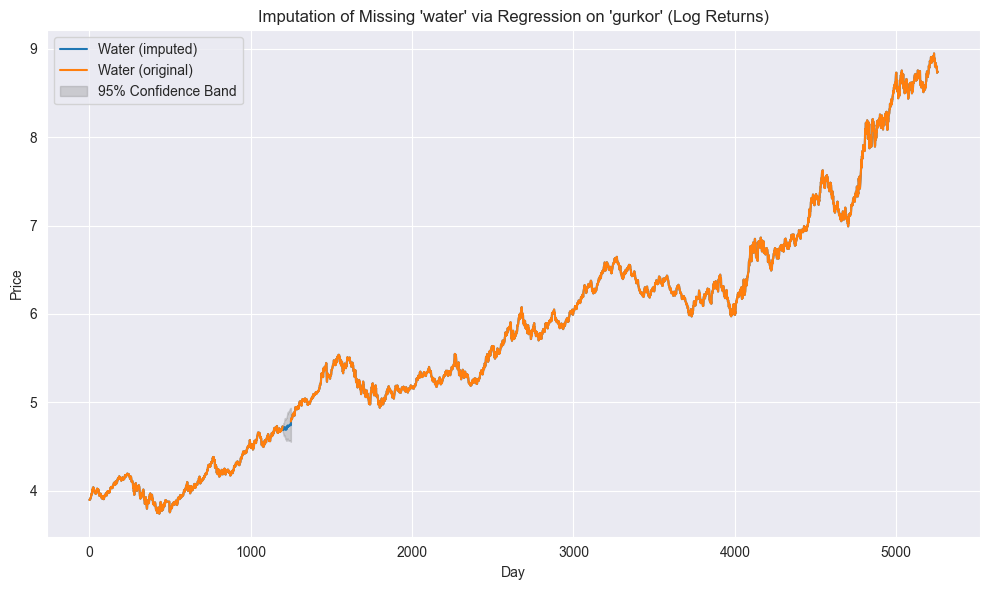

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Step 1: Compute log returns
log_returns = np.log(data_filtered / data_filtered.shift(1))

# Step 2: Prepare regression model (now predicting 'water' from 'gurkor')
df_non_missing = log_returns.dropna(subset=['water', 'gurkor'])  # Swap columns
X_train = df_non_missing['gurkor'].values.reshape(-1, 1)        # Feature = 'gurkor'
Y_train = df_non_missing['water'].values.reshape(-1, 1)         # Target = 'water'

model = LinearRegression()
model.fit(X_train, Y_train)

# Step 3: Compute residuals and standard error
residuals = Y_train - model.predict(X_train)
mse = mean_squared_error(Y_train, model.predict(X_train))
X_mean = np.mean(X_train)
n = len(X_train)
SS_xx = np.sum((X_train - X_mean) ** 2)

# Step 4: Identify where 'water' is missing but 'gurkor' is available
missing_water_idx = log_returns[log_returns['water'].isna()].index
valid_predict_rows = log_returns.loc[missing_water_idx].dropna(subset=['gurkor'])

# Step 5: Predict missing log returns for 'water'
X_pred = valid_predict_rows['gurkor'].values.reshape(-1, 1)
predicted_returns = model.predict(X_pred)
pred_se = np.sqrt(mse * (1 + 1/n + (X_pred - X_mean)**2 / SS_xx))  # Standard error

# Step 6: Impute 'water' with uncertainty
log_returns_imputed = log_returns.copy()
log_returns_imputed.loc[valid_predict_rows.index, 'water'] = predicted_returns.flatten()

# Step 7: Reconstruct price series with uncertainty
start_price_water = data_filtered['water'].dropna().iloc[0]  # Use first valid 'water' price
reconstructed_water = log_returns_imputed['water'].copy()
reconstructed_water.iloc[0] = np.log(start_price_water)
reconstructed_water = reconstructed_water.cumsum().apply(np.exp)

# Cumulative uncertainty for 'water'
pred_se_cumulative = np.sqrt(np.cumsum(pred_se**2))
lower_bound_water = reconstructed_water.loc[valid_predict_rows.index] * np.exp(-1.96 * pred_se_cumulative)
upper_bound_water = reconstructed_water.loc[valid_predict_rows.index] * np.exp(1.96 * pred_se_cumulative)

# Step 8: Update DataFrame and plot
df_imputed_water = data_filtered.copy()
df_imputed_water['water_imputed'] = df_imputed_water['water']
df_imputed_water.loc[valid_predict_rows.index, 'water_imputed'] = reconstructed_water.loc[valid_predict_rows.index]

plt.figure(figsize=(10, 6))
df_imputed_water["water_imputed"].plot(label="Water (imputed)")
df_imputed_water["water"].plot(label="Water (original)")
plt.fill_between(valid_predict_rows.index, lower_bound_water, upper_bound_water, 
                 color='gray', alpha=0.3, label="95% Confidence Band")
#plt.scatter(valid_predict_rows.index, df_imputed_water.loc[valid_predict_rows.index, 'water_imputed'],
#            color='red', label="Predicted Water", zorder=1)
plt.title("Imputation of Missing 'water' via Regression on 'gurkor' (Log Returns)")
plt.xlabel("Day")
plt.ylabel("Price")
plt.legend()
#plt.xlim(1175,1300)
#plt.xlim(0,2000)
plt.tight_layout()
plt.show()



C:\Users\Viggo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\Viggo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\Viggo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, 

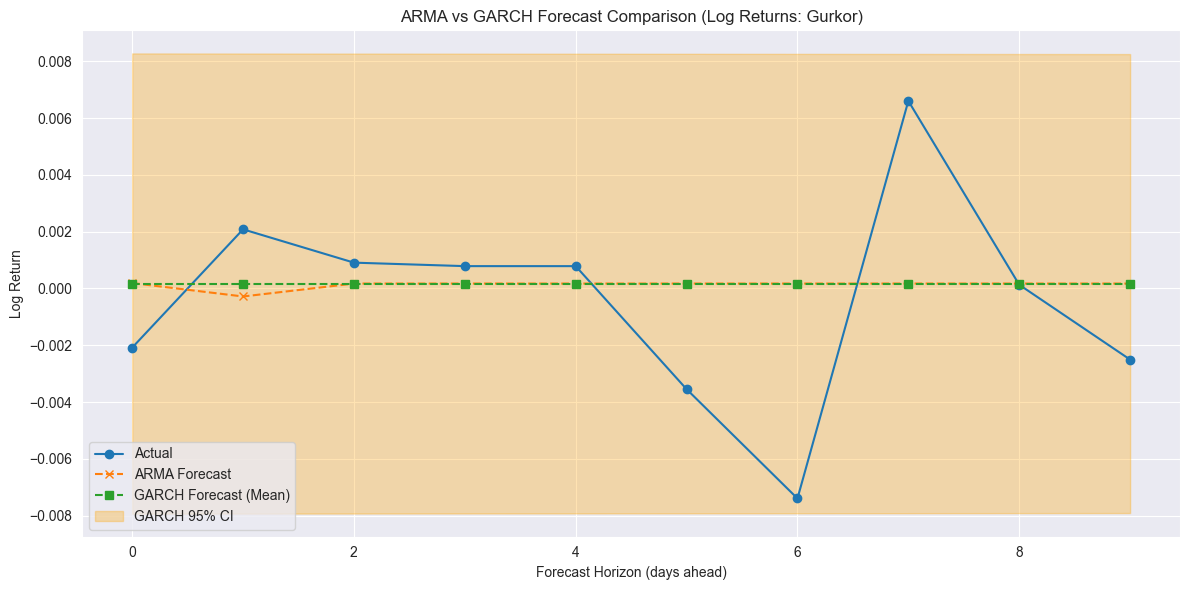

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from arch import arch_model

# Load and prepare data
log_returns = np.log(data_filtered / data_filtered.shift(1)).dropna()
series = log_returns['gurkor'].dropna()

# Forecast window
train_size = 4000
horizon = 10
start_index = 300

train_data = series[start_index:start_index + train_size]
test_data = series[start_index + train_size:start_index + train_size + horizon]

# --- ARMA(1,1) ---
arma_model = ARIMA(train_data, order=(0, 0, 2)).fit()
arma_forecast = arma_model.forecast(steps=horizon)

# --- GARCH(1,1) ---
garch_model = arch_model(train_data, vol='GARCH', p=1, q=1)
garch_fit = garch_model.fit(disp='off')
garch_forecast = garch_fit.forecast(horizon=horizon)
garch_mean = garch_forecast.mean.iloc[-1].values
garch_vol = np.sqrt(garch_forecast.variance.iloc[-1].values)

# --- Plot ---
plt.figure(figsize=(12, 6))
plt.plot(range(horizon), test_data.values, label='Actual', marker='o')
plt.plot(range(horizon), arma_forecast, label='ARMA Forecast', linestyle='--', marker='x')
plt.plot(range(horizon), garch_mean, label='GARCH Forecast (Mean)', linestyle='--', marker='s')
plt.fill_between(range(horizon), garch_mean - 1.96 * garch_vol, garch_mean + 1.96 * garch_vol,
                 alpha=0.3, color='orange', label='GARCH 95% CI')
plt.title("ARMA vs GARCH Forecast Comparison (Log Returns: Gurkor)")
plt.xlabel("Forecast Horizon (days ahead)")
plt.ylabel("Log Return")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [5]:
from statsmodels.tsa.stattools import arma_order_select_ic

order_results = arma_order_select_ic(log_returns['gurkor'].dropna(), max_ar=5, max_ma=5, ic='aic')
print("Best ARMA order (AIC):", order_results.aic_min_order)

C:\Users\Viggo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Viggo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Viggo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Viggo\AppData\Local\Packages

Best ARMA order (AIC): (np.int64(0), np.int64(2))


#### We want to find the best GARCH model for $p,q\in\{0,1,2,3\}$

In [28]:
import pandas as pd
import numpy as np
from arch import arch_model

def find_best_garch(series_name, series, max_p=3, max_q=3):
    best_aic = np.inf
    best_order = None
    series_rescaled = series * 100  # recommended scaling

    for p in range(max_p + 1):
        for q in range(max_q + 1):
            if p == 0 and q == 0:
                continue
            try:
                model = arch_model(series_rescaled, vol='GARCH', p=p, q=q, rescale=True)
                result = model.fit(disp='off')
                if result.aic < best_aic:
                    best_aic = result.aic
                    best_order = (p, q)
            except:
                continue
    return (series_name, best_order, best_aic)

# Assuming data_filtered exists and log_returns is computed
log_returns = np.log(data_filtered / data_filtered.shift(1)).dropna()

# Loop through all series
results = []
for col in log_returns.columns:
    series = log_returns[col].dropna()
    result = find_best_garch(col, series, max_p=4, max_q=4)
    results.append(result)

# Create and display results table
results_df = pd.DataFrame(results, columns=["Series", "Best GARCH(p,q)", "AIC"])
print(results_df.sort_values("Series").to_string(index=False))

      Series Best GARCH(p,q)          AIC
     guitars          (2, 1) 16030.384629
      gurkor          (1, 1)  4150.138976
  slingshots          (2, 1) 15801.596876
      stocks          (1, 0) 17784.649261
       sugar          (2, 2) 16722.893125
tranquillity          (3, 3) 15487.966213
       water          (1, 1)  3059.742590


#### The AIC helps us find the best fit while minimizing overfitting. But some like Tranquility might get similar AIC with lower p,q so we check these by hand

In [27]:
import pandas as pd
import numpy as np
from arch import arch_model

def garch_aic_grid(series, max_p=3, max_q=3, rescale=True):
    results = []
    y = series.dropna()
    if rescale:
        y = y * 100  # Scale for stability

    for p in range(max_p + 1):
        for q in range(max_q + 1):
            if p == 0 and q == 0:
                continue  # skip GARCH(0,0)
            try:
                model = arch_model(y, vol='GARCH', p=p, q=q)
                fit = model.fit(disp='off')
                results.append({
                    'p': p,
                    'q': q,
                    'AIC': fit.aic
                })
            except:
                results.append({
                    'p': p,
                    'q': q,
                    'AIC': np.nan
                })
    
    return pd.DataFrame(results).pivot(index='p', columns='q', values='AIC')

log_returns = np.log(data_filtered / data_filtered.shift(1)).dropna()
aic_grid = garch_aic_grid(log_returns['water'])  
print(aic_grid)


q            0            1            2            3
p                                                    
0          NaN          NaN          NaN          NaN
1  3537.168456  3059.742590  3060.291395  3061.659548
2  3456.150252  3061.742590  3062.291395  3063.659548
3  3421.184586  3063.742897  3064.291397  3065.659548


We see above that $p=1=q$ gives similar results to $p=5=q$ so might as well use that to avoid overfitting

### Next we test if our models are statistically sound

Iteration:      1,   Func. Count:      6,   Neg. LLF: 4076199.676908377
Iteration:      2,   Func. Count:     16,   Neg. LLF: 2081.164735039286
Iteration:      3,   Func. Count:     22,   Neg. LLF: 7959.006926075455
Iteration:      4,   Func. Count:     29,   Neg. LLF: 4255.166616103019
Iteration:      5,   Func. Count:     35,   Neg. LLF: 8097.358895178507
Iteration:      6,   Func. Count:     42,   Neg. LLF: 63689408.33787386
Iteration:      7,   Func. Count:     52,   Neg. LLF: 4953337835.18697
Iteration:      8,   Func. Count:     60,   Neg. LLF: 1640.6040858149026
Iteration:      9,   Func. Count:     66,   Neg. LLF: 2932.0307015021917
Iteration:     10,   Func. Count:     72,   Neg. LLF: 1918361772.1731129
Iteration:     11,   Func. Count:     79,   Neg. LLF: 1654.7019556375833
Iteration:     12,   Func. Count:     85,   Neg. LLF: 1639.9790252281236
Iteration:     13,   Func. Count:     91,   Neg. LLF: 2062.7139587193324
Iteration:     14,   Func. Count:     98,   Neg. LLF: 1629.

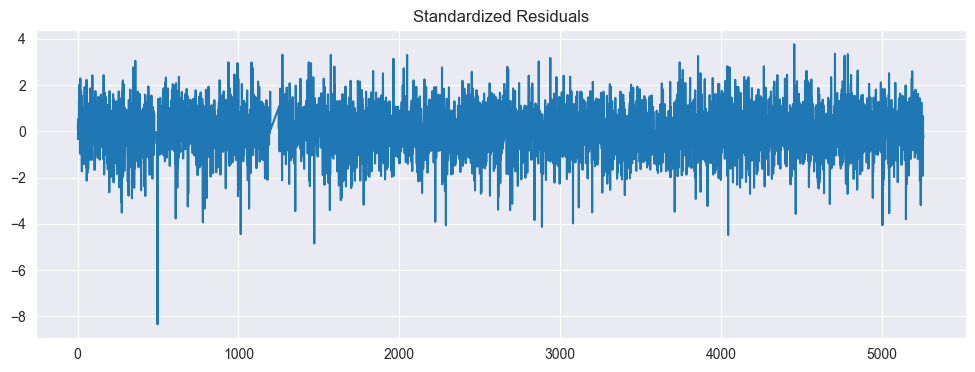

Ljung-Box test on residuals:
      lb_stat  lb_pvalue
10  7.712662   0.656881
ARCH LM Test:
F-stat = 6.274697921363597 , p-value = 0.7916804382713332


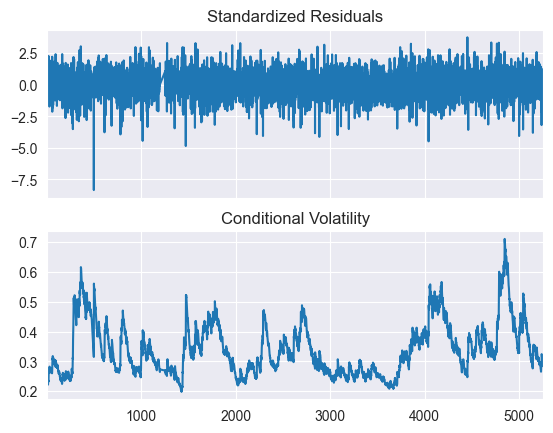

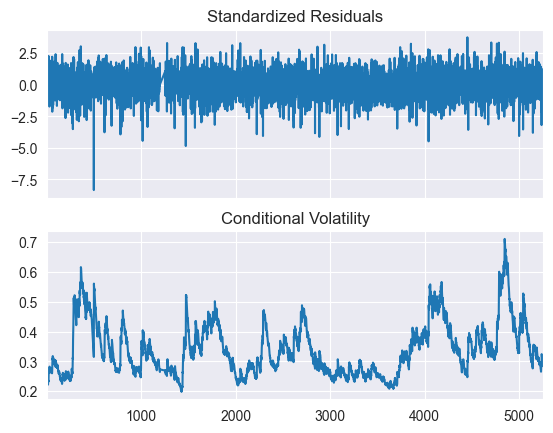

In [ ]:
from arch import arch_model
from statsmodels.stats.diagnostic import acorr_ljungbox
from arch.__future__ import reindexing
import matplotlib.pyplot as plt

# Step 1: Rescale log returns
y = log_returns['water'].dropna()*100

# Step 2: Fit model
model = arch_model(y, vol='GARCH', p=1, q=1)
fit = model.fit()

# Step 3: Print summary
print(fit.summary())

# Step 4: Check residuals
resid = fit.resid / fit.conditional_volatility

# Plot standardized residuals
plt.figure(figsize=(12, 4))
plt.plot(resid)
plt.title("Standardized Residuals")
plt.grid(True)
plt.show()

# Step 5: Ljung-Box test (residual autocorrelation)
ljungbox = acorr_ljungbox(resid, lags=[10], return_df=True)
print("Ljung-Box test on residuals:\n", ljungbox)

# Step 6: ARCH LM test (remaining ARCH effects)
from statsmodels.stats.diagnostic import het_arch
arch_test = het_arch(resid)
print("ARCH LM Test:\nF-stat =", arch_test[0], ", p-value =", arch_test[1])


Ljung-Box Test

    Purpose: Checks if residuals (standardized) are autocorrelated

    Result:
    p=0.067⇒Fail to reject null⇒No autocorrelation left


ARCH LM Test

    Purpose: Checks if there’s still an ARCH effect left in residuals (i.e., volatility clustering that your model didn’t capture)

    Result:
    p=0.796⇒Fail to reject null⇒No leftover ARCH

Check convergence

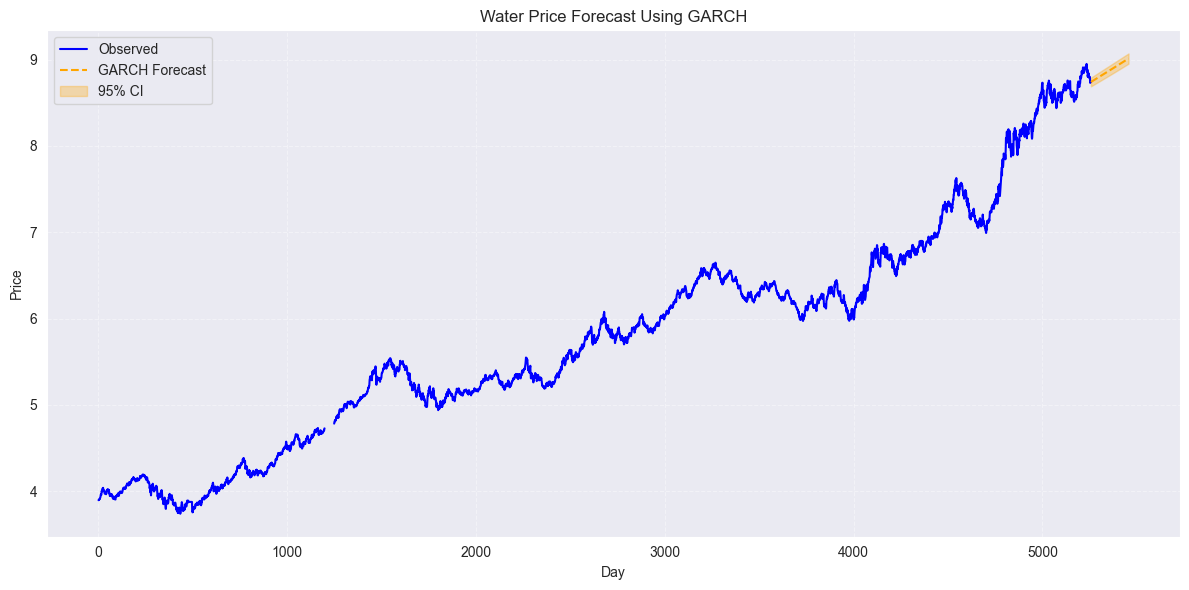

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Forecast next 200 log returns
garch_forecast = fit.forecast(horizon=200)

# Scale back the forecasted returns and volatility
mean_returns = garch_forecast.mean.iloc[-1].values / 100
volatility = np.sqrt(garch_forecast.variance.iloc[-1].values) / 100


# Step 2: Reconstruct forecasted price
last_price = data_filtered['water'].dropna().iloc[-1]
price_forecast = [last_price]
upper = [last_price]
lower = [last_price]

for mu, sigma in zip(mean_returns, volatility):
    next_price = price_forecast[-1] * np.exp(mu)
    price_forecast.append(next_price)

    # Confidence bands using ±1.96 * sigma
    upper.append(price_forecast[-1] * np.exp(1.96 * sigma))
    lower.append(price_forecast[-1] * np.exp(-1.96 * sigma))

# Remove first value (last observed)
price_forecast = price_forecast[1:]
upper = upper[1:]
lower = lower[1:]

# Step 3: Plot
forecast_index = range(data_filtered['water'].dropna().index[-1] + 1,
                       data_filtered['water'].dropna().index[-1] + 1 + 200)

plt.figure(figsize=(12, 6))
data_filtered['water'].plot(label='Observed', color='blue')
plt.plot(forecast_index, price_forecast, label='GARCH Forecast', color='orange', linestyle='--')
plt.fill_between(forecast_index, lower, upper, color='orange', alpha=0.3, label='95% CI')
plt.title("Water Price Forecast Using GARCH")
plt.xlabel("Day")
plt.ylabel("Price")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


<Axes: >

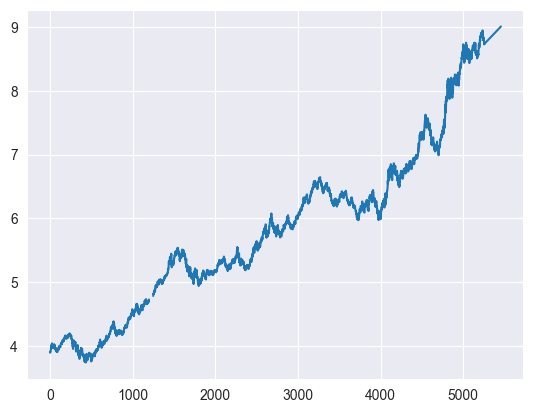

In [13]:
# Step 1: Make a copy of the original data
water_forecasted = data_filtered['water'].copy()

# Step 2: Identify the last 200 indices (the missing tail)
forecast_start_index = water_forecasted.last_valid_index() + 1
forecast_index = range(forecast_start_index, forecast_start_index + len(price_forecast))

# Step 3: Assign the forecasted values to those indices
forecast_series = pd.Series(price_forecast, index=forecast_index)
water_forecasted = pd.concat([water_forecasted, forecast_series])

water_forecasted.plot()

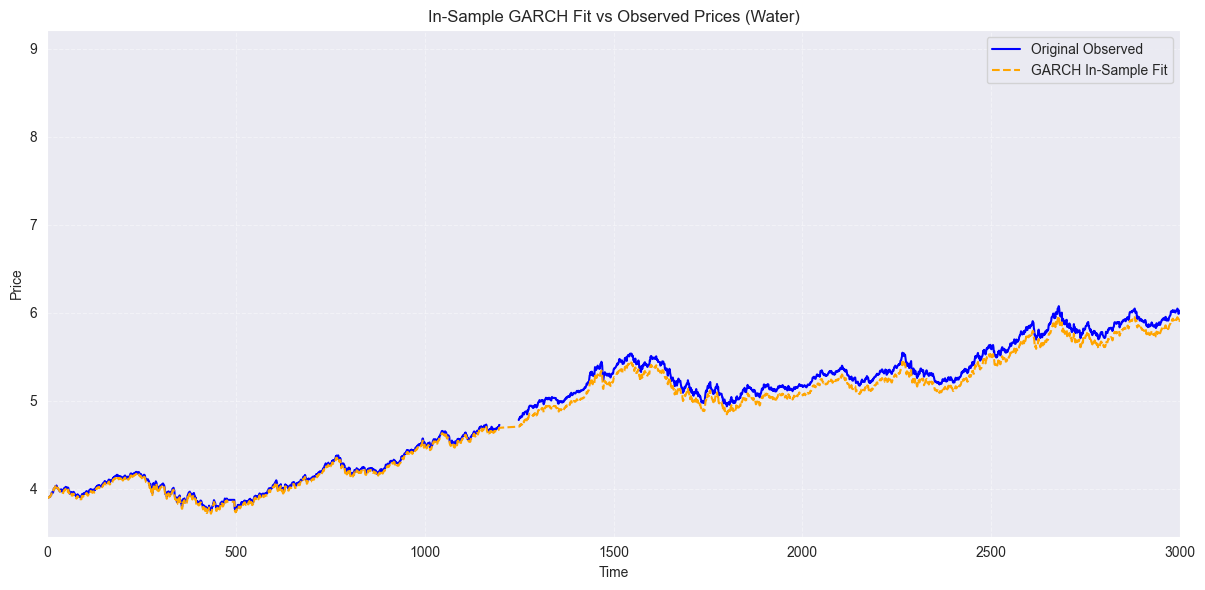

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from arch import arch_model

# Compute log returns and rescale
log_returns = np.log(data_filtered['water'] / data_filtered['water'].shift(1)).dropna()
returns_scaled = log_returns * 100

# Fit GARCH model (use your chosen order)
model = arch_model(returns_scaled, vol='GARCH', p=1, q=1)
fit = model.fit(disp='off')

# Extract fitted values (mean return per step)
fitted_mean = fit.params['mu'] + fit.std_resid * fit.conditional_volatility
fitted_mean = fitted_mean / 100  # rescale back

# Reconstruct price path from first observed price
start_price = data_filtered['water'].dropna().iloc[0]
fitted_prices = [start_price]
for r in fitted_mean:
    fitted_prices.append(fitted_prices[-1] * np.exp(r))
fitted_prices = fitted_prices[1:]

# Create Series for plotting
fitted_index = log_returns.index[:len(fitted_prices)]
fitted_series = pd.Series(fitted_prices, index=fitted_index)

# Plot comparison
plt.figure(figsize=(12, 6))
data_filtered['water'].plot(label='Original Observed', color='blue')
fitted_series.plot(label='GARCH In-Sample Fit', color='orange', linestyle='--')
plt.title("In-Sample GARCH Fit vs Observed Prices (Water)")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.xlim(0000,3000)
plt.show()
